In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16, 6

import os
from sklearn.linear_model import lasso_path, enet_path, LogisticRegression
from sklearn.linear_model import ElasticNetCV, ElasticNet, Lasso, LassoCV, Ridge, RidgeCV, LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import TimeSeriesSplit

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error,mean_absolute_error,r2_score

from scipy.stats.stats import pearsonr

import statsmodels.api as sm
import warnings
import itertools
#from sklearn.cross_validation import KFold 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from matplotlib.pylab import rcParams

In [3]:
# from Stacking import *

In [4]:
pd.set_option('display.max_columns', 80)
pd.set_option('display.max_rows', 80)

In [5]:
file_list = os.listdir('gt_f')

In [6]:
file = []
for i in file_list:
    data = pd.read_csv('gt_f/'+i,index_col='Week')
    data.index = pd.DatetimeIndex(data.index)
    file.append(data)
features = file[0]
for i in range(1,len(file)):
    features = features.join(file[i])

In [7]:
features.shape

(661, 62)

In [8]:
#x_path = '/Users/yaowangyi/Desktop/data/gt_features/x_gt_data.xlsx'
y_path = '/Users/yaowangyi/Desktop/data/gt_features/y_gastroenteritis_eng.csv'


In [9]:
gt_data = features

In [10]:
rcgp_data = pd.read_csv(y_path,index_col='week')
time_line = pd.date_range('2004-01-04',freq='7D', periods=657)
rcgp_data.index = time_line

In [11]:
#Correlation coefficient for features with RCGP data
corr_tab = rcgp_data.join(gt_data).corr()
#corr_tab
corr_tab.shape

(63, 63)

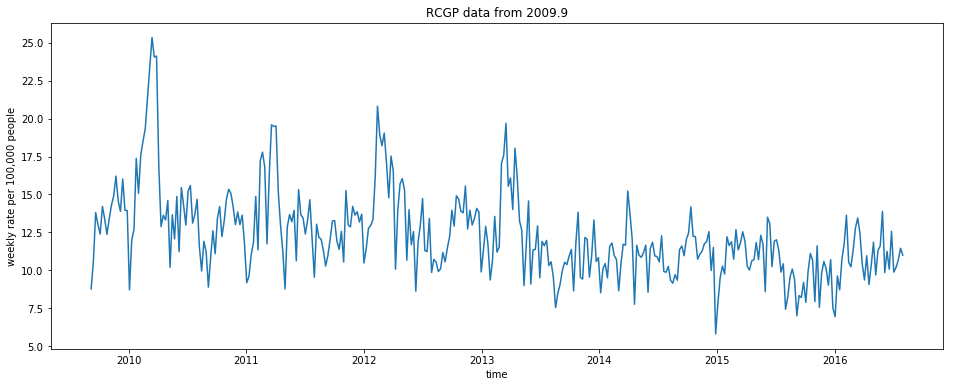

In [12]:
# real RCGP data
rcgp_line = pd.date_range(start='2009-09-01',end = '2016-07-31')
rcgp_2010_2016 = rcgp_data.loc[rcgp_line,:].dropna(0)
plt.plot(rcgp_2010_2016, label = 'weekly Rate')
plt.plot(figsize=(12, 10))
plt.xlabel('time')
plt.ylabel('weekly rate per 100,000 people')
plt.title('RCGP data from 2009.9')

In [13]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

## ARIMA

In [14]:
ts = rcgp_data

ts_1 = ts.loc["2004-09-05":"2009-09-06"]
ts_2 = ts.loc["2004-09-05":"2010-09-01"]
ts_3 = ts.loc["2004-09-05":"2011-09-01"]
ts_4 = ts.loc["2004-09-05":"2012-09-01"]
ts_5 = ts.loc["2004-09-05":"2013-09-01"]
ts_6 = ts.loc["2004-09-05":"2014-09-01"]
ts_7 = ts.loc["2004-09-05":"2015-09-01"]

test_1 = ts.loc["2009-09-06":"2010-08-29"]
test_2 = ts.loc["2010-09-05":"2011-08-28"]
test_3 = ts.loc["2011-09-04":"2012-08-26"]
test_4 = ts.loc["2012-09-02":"2013-09-01"]
test_5 = ts.loc["2013-09-08":"2014-08-31"]
test_6 = ts.loc["2014-09-07":"2015-08-30"]
test_7 = ts.loc["2015-09-06":"2016-07-31"]

### arima 1 --> 2009-09-06 - 2010-08-29

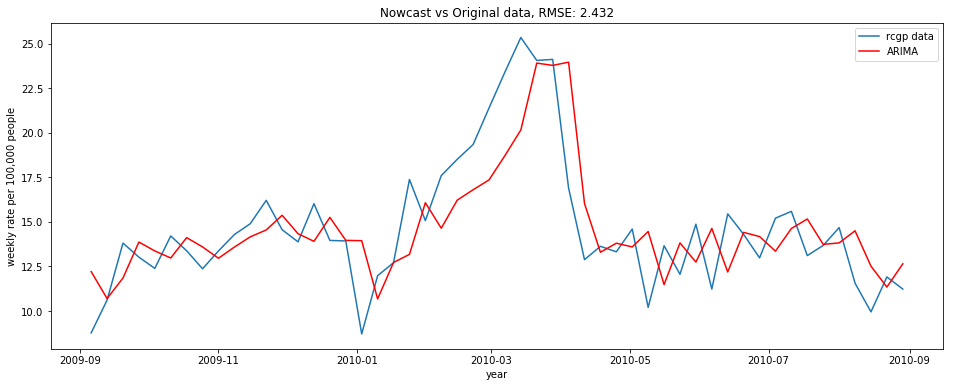

In [15]:
X = rcgp_data.values
train_1, test_1 = X[35:296], X[296:348]

history = [x for x in train_1]
predictions_2009 = list()

for t in range(len(test_1)):
    model = sm.tsa.statespace.SARIMAX(history, order=(1,1,1),seasonal_order=(0,0,0,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions_2009.append(yhat)
    obs = test_1[t]
    history.append(obs)
    # print('predicted=%f, expected=%f' % (yhat, obs))

# plot
plt.plot(pd.date_range(start='2009-09-06',freq='7D',periods=len(test_1)),test_1,label='rcgp data')
plt.plot(pd.date_range(start='2009-09-06',freq='7D',periods=len(test_1)),predictions_2009, color='red',label = 'ARIMA')
plt.xlabel('year')
plt.ylabel('weekly rate per 100,000 people')
plt.legend()
error = mean_squared_error(test_1, predictions_2009)
rmse = np.sqrt(error)
plt.title('Nowcast vs Original data, RMSE: %.3f'%rmse)


In [16]:
predictions_2009 = np.asarray(predictions_2009).reshape([52,1])

np.corrcoef(test_1.reshape([1,52]), predictions_2009.reshape([1,52]))

array([[ 1.        ,  0.74877246],
       [ 0.74877246,  1.        ]])

In [17]:
mean_squared_error(test_1, predictions_2009)

5.9170286360971183

In [18]:
np.sqrt(np.mean((test_1 - predictions_2009)**2))

2.4324943239598973

In [19]:
mean_absolute_error(test_1, predictions_2009)

1.851725097086961

In [20]:
mean_absolute_percentage_error(test_1, predictions_2009)

13.255592258248333

In [21]:
# & ARIMA & 0.7596 & 5.8649 & 2.4217 & 1.8428 & 13.3898 \\

### arima 2 --> 2010-09-05 - 2011-08-28

In [22]:
import warnings
warnings.filterwarnings('ignore')

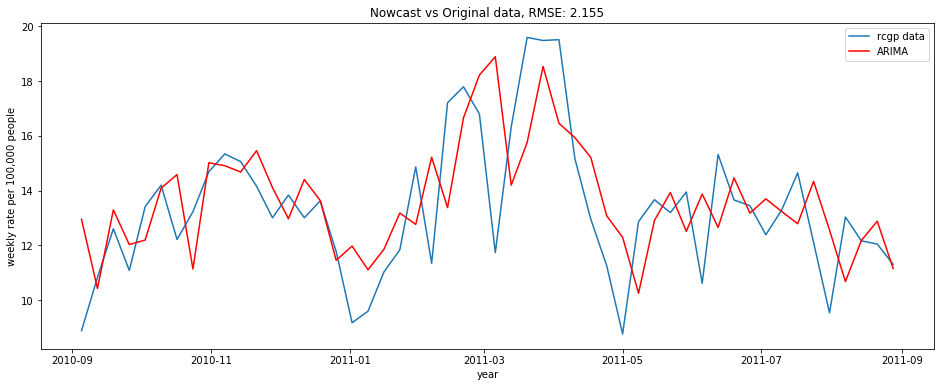

In [23]:
X = rcgp_data.values
train_2, test_2 = X[35:348], X[348:400] #

history = [x for x in train_2]  #
predictions_2010 = list()  #

for t in range(len(test_2)):  #
    model = sm.tsa.statespace.SARIMAX(history, order=(1,1,1),seasonal_order=(1,0,1,52)) #
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions_2010.append(yhat)  #
    obs = test_2[t]  #
    history.append(obs)
    # print('predicted=%f, expected=%f' % (yhat, obs))

# plot
plt.plot(pd.date_range(start='2010-09-05',freq='7D',periods=len(test_2)),test_2,label='rcgp data')
plt.plot(pd.date_range(start='2010-09-05',freq='7D',periods=len(test_2)),predictions_2010, color='red',label = 'ARIMA')
plt.xlabel('year')
plt.ylabel('weekly rate per 100,000 people')
plt.legend()
error = mean_squared_error(test_2, predictions_2010)
rmse = np.sqrt(error)
plt.title('Nowcast vs Original data, RMSE: %.3f'%rmse)


In [24]:
predictions_2010 = np.asarray(predictions_2010).reshape([52,1])

np.corrcoef(test_2.reshape([1,52]), predictions_2010.reshape([1,52]))

array([[ 1.       ,  0.5690254],
       [ 0.5690254,  1.       ]])

In [25]:
mean_squared_error(test_2, predictions_2010)

4.6448324210933984

In [26]:
np.sqrt(np.mean((test_2 - predictions_2010)**2))

2.1551873285386121

In [27]:
mean_absolute_error(test_2, predictions_2010)

1.6672013206374388

In [28]:
mean_absolute_percentage_error(test_2, predictions_2010)

13.35537127937892

### arima 3 --> 2011-09-04 - 2012-08-26

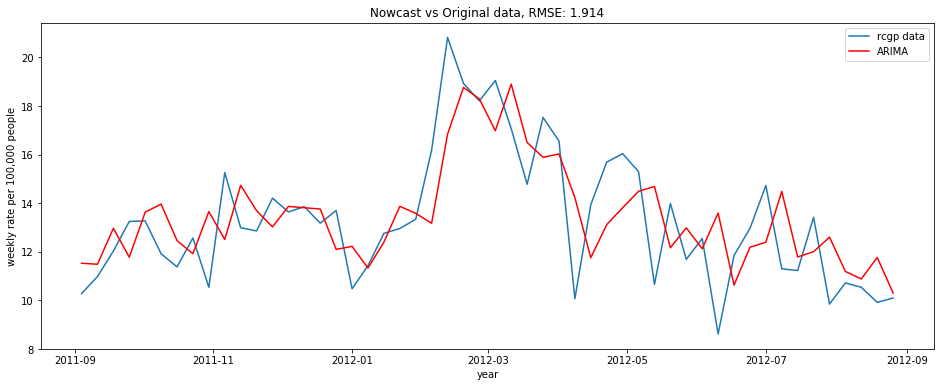

In [30]:
X = rcgp_data.values
train_3, test_3 = X[35:400], X[400:452] #

history = [x for x in train_3]  #
predictions_2011 = list()  #

for t in range(len(test_3)):  #
    model = sm.tsa.statespace.SARIMAX(history, order=(2,0,1),seasonal_order=(1,0,1,52)) #
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions_2011.append(yhat)  #
    obs = test_3[t]  #
    history.append(obs)
    # print('predicted=%f, expected=%f' % (yhat, obs))

# plot
plt.plot(pd.date_range(start='2011-09-04',freq='7D',periods=len(test_3)),test_3,label='rcgp data')
plt.plot(pd.date_range(start='2011-09-04',freq='7D',periods=len(test_3)),predictions_2011, color='red',label = 'ARIMA')
plt.xlabel('year')
plt.ylabel('weekly rate per 100,000 people')
plt.legend()
error = mean_squared_error(test_3, predictions_2011)
rmse = np.sqrt(error)
plt.title('Nowcast vs Original data, RMSE: %.3f'%rmse)


In [31]:
predictions_2011 = np.asarray(predictions_2011).reshape([52,1])

np.corrcoef(test_3.reshape([1,52]), predictions_2011.reshape([1,52]))

array([[ 1.        ,  0.69738888],
       [ 0.69738888,  1.        ]])

In [32]:
mean_squared_error(test_3, predictions_2011)

3.6648143299874172

In [33]:
np.sqrt(np.mean((test_3 - predictions_2011)**2))

1.9143704787703495

In [34]:
mean_absolute_error(test_3, predictions_2011)

1.5072787441203634

In [35]:
mean_absolute_percentage_error(test_3, predictions_2011)

12.034081844311263

In [36]:
# & ARIMA & 0.6973 & 3.6648 & 1.9143 & 1.5072 & 12.0340 \\

### arima 4 --> 2012-09-02 - 2013-09-01

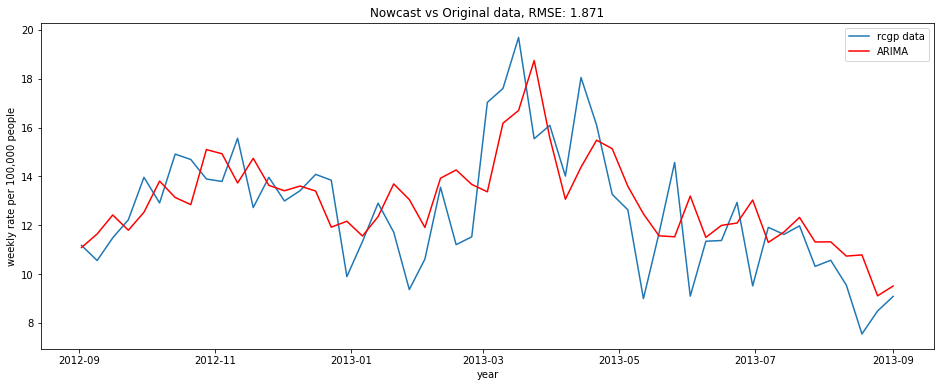

In [37]:
X = rcgp_data.values
train_4, test_4 = X[35:452], X[452:505] #

history = [x for x in train_4]  #
predictions_2012 = list()  #

for t in range(len(test_4)):  #
    model = sm.tsa.statespace.SARIMAX(history, order=(2,1,1),seasonal_order=(1,0,1,52)) #
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions_2012.append(yhat)  #
    obs = test_4[t]  #
    history.append(obs)
    # print('predicted=%f, expected=%f' % (yhat, obs))

# plot
plt.plot(pd.date_range(start='2012-09-02',freq='7D',periods=len(test_4)),test_4,label='rcgp data')
plt.plot(pd.date_range(start='2012-09-02',freq='7D',periods=len(test_4)),predictions_2012, color='red',label = 'ARIMA')
plt.xlabel('year')
plt.ylabel('weekly rate per 100,000 people')
plt.legend()
error = mean_squared_error(test_4, predictions_2012)
rmse = np.sqrt(error)
plt.title('Nowcast vs Original data, RMSE: %.3f'%rmse)

In [38]:
predictions_2012 = np.asarray(predictions_2012).reshape([53,1])

np.corrcoef(test_4.reshape([1,53]), predictions_2012.reshape([1,53]))

array([[ 1.        ,  0.69376352],
       [ 0.69376352,  1.        ]])

In [39]:
mean_squared_error(test_4, predictions_2012)

3.5011949874998431

In [40]:
np.sqrt(np.mean((test_4 - predictions_2012)**2))

1.8711480399743476

In [41]:
mean_absolute_error(test_4, predictions_2012)

1.4689605700290449

In [42]:
mean_absolute_percentage_error(test_4, predictions_2012)

12.296268335022312

In [43]:
# & ARIMA & 0.6937 & 3.5011 & 1.8711 & 1.4689 & 12.2962 \\

### arima 5 --> 2013-09-08 - 2014-08-31

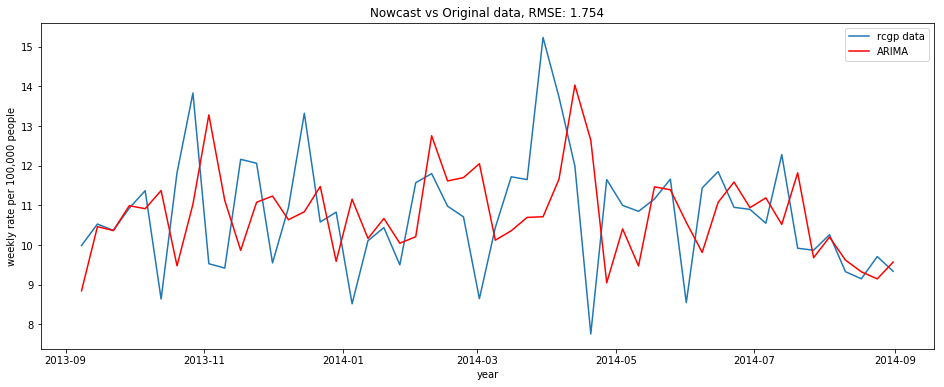

In [44]:
X = rcgp_data.values
train_5, test_5 = X[35:505], X[505:557] #

history = [x for x in train_5]  #
predictions_2013 = list()  #

for t in range(len(test_5)):  #
    model = sm.tsa.statespace.SARIMAX(history, order=(2,1,0),seasonal_order=(1,0,1,52)) #
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions_2013.append(yhat)  #
    obs = test_5[t]  #
    history.append(obs)
    # print('predicted=%f, expected=%f' % (yhat, obs))

# plot
plt.plot(pd.date_range(start='2013-09-08',freq='7D',periods=len(test_5)),test_5,label='rcgp data')
plt.plot(pd.date_range(start='2013-09-08',freq='7D',periods=len(test_5)),predictions_2013, color='red',label = 'ARIMA')
plt.xlabel('year')
plt.ylabel('weekly rate per 100,000 people')
plt.legend()
error = mean_squared_error(test_5, predictions_2013)
rmse = np.sqrt(error)
plt.title('Nowcast vs Original data, RMSE: %.3f'%rmse)

In [45]:
predictions_2013 = np.asarray(predictions_2013).reshape([52,1])

np.corrcoef(test_5.reshape([1,52]), predictions_2013.reshape([1,52]))

array([[ 1.        ,  0.02138935],
       [ 0.02138935,  1.        ]])

In [46]:
mean_squared_error(test_5, predictions_2013)

3.0773621185231472

In [47]:
np.sqrt(np.mean((test_5 - predictions_2013)**2))

1.7542411802608977

In [48]:
mean_absolute_error(test_5, predictions_2013)

1.3064398837769648

In [49]:
mean_absolute_percentage_error(test_5, predictions_2013)

12.388716142960799

In [50]:
# & ARIMA & 0.2018 & 3.1440 & 1.7731 & 1.3756 & 13.3561 \\

### arima 6 --> 2014-09-07 - 2015-08-30

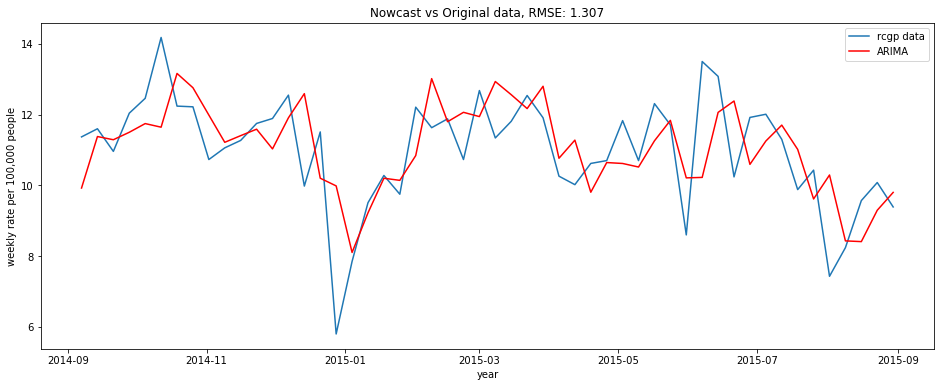

In [51]:
X = rcgp_data.values
train_6, test_6 = X[35:557], X[557:609] #

history = [x for x in train_6]  #
predictions_2014 = list()  #

for t in range(len(test_6)):  #
    model = sm.tsa.statespace.SARIMAX(history, order=(2,1,1),seasonal_order = (1,0,1,52)) #
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions_2014.append(yhat)  #
    obs = test_6[t]  #
    history.append(obs)
    # print('predicted=%f, expected=%f' % (yhat, obs))

# plot
plt.plot(pd.date_range(start='2014-09-07',freq='7D',periods=len(test_6)),test_6,label='rcgp data')
plt.plot(pd.date_range(start='2014-09-07',freq='7D',periods=len(test_6)),predictions_2014, color='red',label = 'ARIMA')
plt.xlabel('year')
plt.ylabel('weekly rate per 100,000 people')
plt.legend()
error = mean_squared_error(test_6, predictions_2014)
rmse = np.sqrt(error)
plt.title('Nowcast vs Original data, RMSE: %.3f'%rmse)

In [52]:
predictions_2014 = np.asarray(predictions_2014).reshape([52,1])

np.corrcoef(test_6.reshape([1,52]), predictions_2014.reshape([1,52]))

array([[ 1.        ,  0.57223825],
       [ 0.57223825,  1.        ]])

In [53]:
mean_squared_error(test_6, predictions_2014)

1.7082053997612638

In [54]:
np.sqrt(np.mean((test_6 - predictions_2014)**2))

1.3069833203837238

In [55]:
mean_absolute_error(test_6, predictions_2014)

0.98436841909552897

In [56]:
mean_absolute_percentage_error(test_6, predictions_2014)

9.6870592331707659

In [57]:
# & ARIMA & 0.5722 & 1.7082 & 1.3069 & 0.9843 & 9.6870 \\

### arima 7 --> 2015-09-06 - 2016-07-31

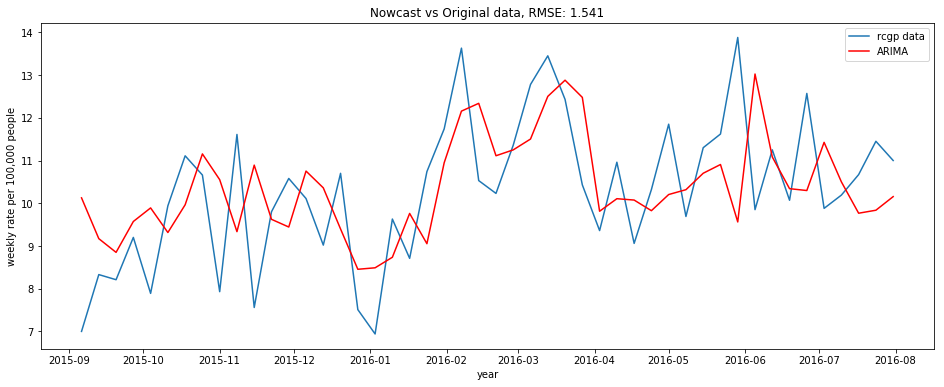

In [58]:
X = rcgp_data.values
train_7, test_7 = X[35:609], X[609:657] #

history = [x for x in train_7]  #
predictions_2015 = list()  #

for t in range(len(test_7)):  #
    model = sm.tsa.statespace.SARIMAX(history, order=(2,1,1),seasonal_order=(1,0,1,52)) #
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions_2015.append(yhat)  #
    obs = test_7[t]  #
    history.append(obs)
    # print('predicted=%f, expected=%f' % (yhat, obs))

# plot
plt.plot(pd.date_range(start='2015-09-06',freq='7D',periods=len(test_7)),test_7,label='rcgp data')
plt.plot(pd.date_range(start='2015-09-06',freq='7D',periods=len(test_7)),predictions_2015, color='red',label = 'ARIMA')
plt.xlabel('year')
plt.ylabel('weekly rate per 100,000 people')
plt.legend()
error = mean_squared_error(test_7, predictions_2015)
rmse = np.sqrt(error)
plt.title('Nowcast vs Original data, RMSE: %.3f'%rmse)

In [59]:
predictions_2015 = np.asarray(predictions_2015).reshape([48,1])

np.corrcoef(test_7.reshape([1,48]), predictions_2015.reshape([1,48]))

array([[ 1.        ,  0.43325795],
       [ 0.43325795,  1.        ]])

In [60]:
mean_squared_error(test_7, predictions_2015)

2.3744633715391132

In [61]:
np.sqrt(np.mean((test_7 - predictions_2015)**2))

1.5409293856433244

In [62]:
mean_absolute_error(test_7, predictions_2015)

1.2461022753755919

In [63]:
mean_absolute_percentage_error(test_7, predictions_2015)

12.654186387117628

In [64]:
# & ARIMA & 0.4332 & 2.3744 & 1.5409 & 1.2409 & 12.6541 

In [65]:
# define the Metrics 

In [66]:
def metrics(y_true,y_pred):
    corr_table = y_true.join(y_pred).corr()
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    r = corr_table.values[1][0]
    mse = mean_squared_error(y_true,y_pred)
    rmse = np.sqrt(np.mean((y_true - y_pred)**2))
    mae = mean_absolute_error(y_true,y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r_squared = r2_score(y_true,y_pred)
    metrics_table = pd.DataFrame(np.arange(5).reshape((1,5)),columns=['r','MSE','RMSE','MAE','MAPE'])
    metrics_table['r'] = r
    metrics_table['MSE'] = mse
    metrics_table['RMSE'] = rmse
    metrics_table['MAE'] = mae
    metrics_table['MAPE'] = mape
    #metrics_table['R_square'] = r_squared
    return metrics_table

## Elastic net 

In [67]:
# elastic net 1

In [68]:
# 2004.9.1-2009.9.1 -> 2009.9.1-2010.9.1
train_line_1 = pd.date_range(start= '2004-09-01', end='2009-09-01')
test_line_1 = pd.date_range(start='2009-09-01',end = '2010-09-01')
x_train_1 = gt_data.loc[train_line_1,:].dropna(0)
y_train_1 = rcgp_data.loc[train_line_1,:].dropna(0)
x_test_1 = gt_data.loc[test_line_1,:].dropna(0)
y_test_1 = rcgp_data.loc[test_line_1,:].dropna(0)

In [69]:
parameters = {'alpha': np.arange(4,10,0.5),'l1_ratio':[0.5]}

# mycv_1 = TimeSeriesSplit(n_splits =5)
# clf_1 = GridSearchCV(ElasticNet(fit_intercept= False),param_grid=parameters,scoring=make_scorer(mean_squared_error))

clf_1 = GridSearchCV(ElasticNet(fit_intercept= True,max_iter=10000,tol =0.000001),param_grid=parameters,
                     scoring=make_scorer(mean_squared_error))
clf_1.fit(X = x_train_1, y = y_train_1)
predict_y_1 = clf_1.best_estimator_.predict(x_test_1)

In [70]:
clf_1.best_params_

{'alpha': 4.0, 'l1_ratio': 0.5}

In [71]:
weight_1 = clf_1.best_estimator_.coef_
pd.DataFrame(weight_1.reshape(1,62), columns= x_train_1.columns)

Abdominal cramps: (England)  Abdominal pain: (England)  \
0                    -0.000643                       -0.0   

   aching limbs: (England)  Adenovirus: (England)  anti nausea: (England)  \
0                     -0.0                   -0.0                    -0.0   

   Antibiotics: (England)  autumn: (England)  barbecue: (England)  \
0                     0.0           -0.00597             -0.01397   

   bellyache: (England)  bloody diarrhoea: (England)  Diarrhea: (England)  \
0                   0.0                          0.0             0.028112   

   Diarrhoea: (England)  Diarrhoea and vomiting: (England)  \
0                   0.0                           0.018456   

   Dulcolax: (England)  E coli: (England)  emesis: (England)  \
0                 -0.0           0.011609                0.0   

   feel sick: (England)  fever: (England)  Food poisoning: (England)  \
0             -0.001149               0.0                        0.0   

   Gastritis: (England)  Gastro intestinal: (England)  \
0                  -0.0                          -0.0   

   Gastroenteritis: (England)  gastroenteritis contagious: (England)  \
0                    0.005598                              -0.003794   

   gastroenteritis NHS: (England)  Gastroenteritis symptoms: (England)  \
0                       -0.002147                            -0.004899   

   Gastrointestinal: (England)  GI: (England)  Hand Hygiene: (England)  \
0                     0.014172           -0.0                     -0.0   

   headache: (England)  infants: (England)  microorganisms: (England)  \
0             0.025156            0.008968                   0.004979   

   Nausea: (England)  NHS gastroenteritis: (England)  Norovirus: (England)  \
0                0.0                            -0.0             -0.015169   

   Norwalk: (England)  Norwalk virus: (England)  Ondansetron: (England)  \
0                 0.0                      -0.0                    -0.0   

   Oral rehydration therapy: (England)  painful stomach cramps: (England)  \
0                             0.003276                               -0.0   

   Parasites: (England)  raw food: (England)  raw meat: (England)  \
0                  -0.0                  0.0                  0.0   

   rota virus: (England)  Rotavirus vaccine: (England)  Rotavirus: (England)  \
0               0.018691                          -0.0              0.010961   

   Salmonella: (England)  SASP: (England)  seafood: (England)  \
0                   -0.0             -0.0                 0.0   

   spring: (England)  stomach ache: (England)  stomach flu: (England)  \
0            0.05467                     -0.0                     0.0   

   stomachache: (England)  summer: (England)  \
0                    -0.0                0.0   

   Symptoms of gastroenteritis: (England)  throw up: (England)  \
0                               -0.000271                  0.0   

   viral gastroenteritis: (England)  vomit: (England)  vomiting: (England)  \
0                         -0.014748          0.015747                  0.0   

   winter: (England)  Winter vomiting: (England)  \
0           0.015354                         0.0   

   Winter vomiting bug: (England)  Zofran: (England)  
0                            -0.0          -0.007467

In [72]:
np.sum(weight_1!=0)

25

In [73]:
w1 = pd.Series(weight_1, index = x_train_1.columns)
w1.sort_values()

Norovirus: (England)                     -0.015169
viral gastroenteritis: (England)         -0.014748
barbecue: (England)                      -0.013970
Zofran: (England)                        -0.007467
autumn: (England)                        -0.005970
Gastroenteritis symptoms: (England)      -0.004899
gastroenteritis contagious: (England)    -0.003794
gastroenteritis NHS: (England)           -0.002147
feel sick: (England)                     -0.001149
Abdominal cramps: (England)              -0.000643
Symptoms of gastroenteritis: (England)   -0.000271
Winter vomiting bug: (England)           -0.000000
Nausea: (England)                         0.000000
NHS gastroenteritis: (England)           -0.000000
aching limbs: (England)                  -0.000000
Norwalk: (England)                        0.000000
bloody diarrhoea: (England)               0.000000
Ondansetron: (England)                   -0.000000
seafood: (England)                        0.000000
Norwalk virus: (England)       

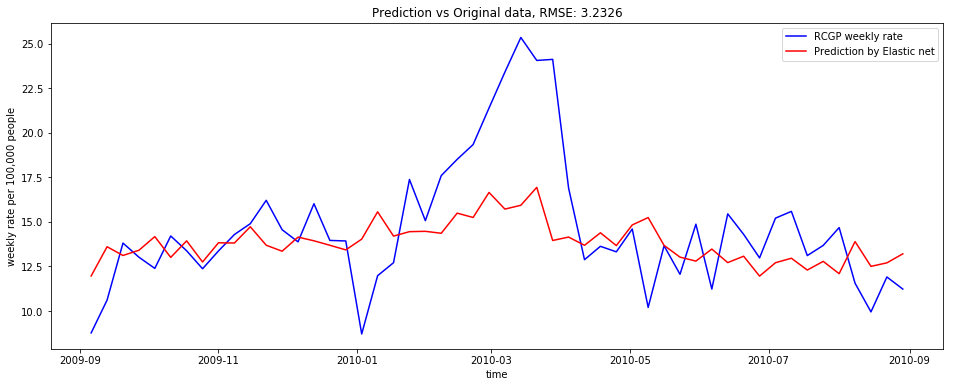

In [74]:
df1_gs = pd.DataFrame(predict_y_1, index=y_test_1.index, columns=['Prediction'])
#df1_gs
plt.plot(y_test_1, color='blue',label='RCGP weekly rate')
plt.plot(df1_gs, color = 'red', label = 'Prediction by Elastic net')
plt.legend()
plt.xlabel('time')
plt.ylabel('weekly rate per 100,000 people')

rmse_1_gs = np.sqrt(np.mean((y_test_1.values - df1_gs.values)**2))
plt.title('Prediction vs Original data, RMSE: %.4f'% rmse_1_gs)

In [76]:
m1_1 = pd.DataFrame(metrics(y_test_1,df1_gs).values, index=['Elastic net'],columns =['r','MSE','RMSE','MAE','MAPE'])

In [77]:
m1_1.iloc[:,0:5]

r        MSE      RMSE       MAE       MAPE
Elastic net  0.598206  10.449613  3.232586  2.305003  15.193491

In [75]:
# linear 1

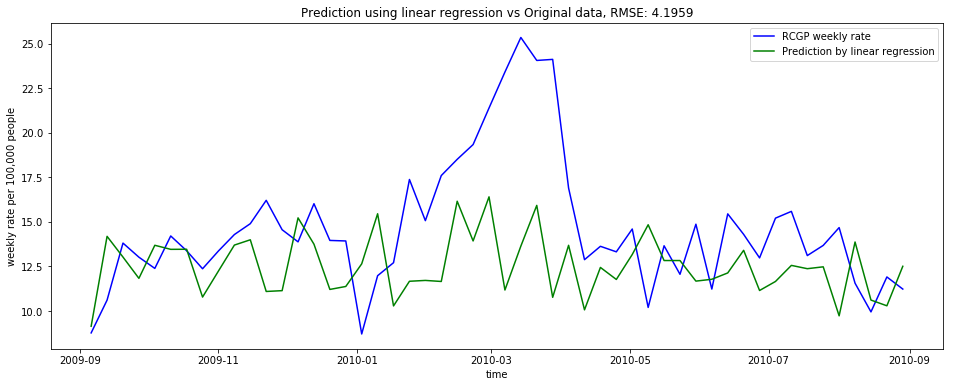

In [216]:
# linear regression (ordinary least square)
linear_1 = LinearRegression(fit_intercept= True)
linear_1.fit(X = x_train_1, y = y_train_1)
linear_train_1 = linear_1.predict(x_test_1)

l1 = pd.DataFrame(linear_train_1, index=y_test_1.index, columns=['Prediction'])

plt.plot(y_test_1, color='blue',label='RCGP weekly rate')
plt.plot(l1, color = 'green', label = 'Prediction by linear regression')

plt.legend()
plt.xlabel('time')
plt.ylabel('weekly rate per 100,000 people')

rmse_1 = np.sqrt(np.mean((y_test_1.values - l1.values)**2))
plt.title('Prediction using linear regression vs Original data, RMSE: %.4f'% rmse_1)

In [77]:
m1_2 = pd.DataFrame(metrics(y_test_1,l1).values, index=['Linear regression'],columns =['r','MSE','RMSE','MAE','MAPE','R_square'])

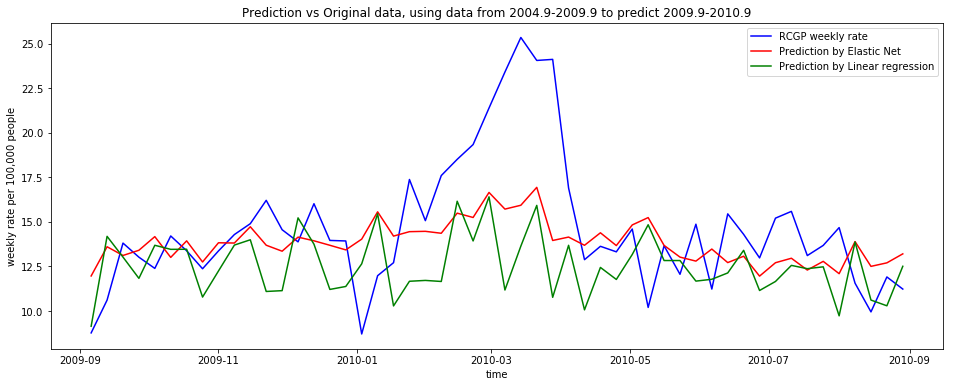

In [78]:
plt.plot(y_test_1, color='blue',label='RCGP weekly rate')
plt.plot(df1_gs, color = 'red', label = 'Prediction by Elastic Net')
plt.plot(l1, color = 'green', label = 'Prediction by Linear regression')

plt.legend()
plt.xlabel('time')
plt.ylabel('weekly rate per 100,000 people')

plt.title('Prediction vs Original data, using data from 2004.9-2009.9 to predict 2009.9-2010.9')
plt.show()

In [79]:
p1= pd.concat([m1_2,m1_1])  
p1.iloc[:,0:5]

r        MSE      RMSE       MAE       MAPE
Linear regression  0.246465  17.605365  4.195875  3.044211  19.057929
Elastic net        0.598206  10.449613  3.232586  2.305003  15.193491

In [80]:
#elastic net 2

In [81]:
# 2004.9.1-2010.9.1 (6 years) -> 2010.9.1-2011.9.1 (1 year)
train_line_2 = pd.date_range(start= '2004-09-01', end='2010-09-01')
test_line_2 = pd.date_range(start='2010-09-01',end = '2011-09-01')
x_train_2 = gt_data.loc[train_line_2,:].dropna(0)
y_train_2 = rcgp_data.loc[train_line_2,:].dropna(0)
x_test_2 = gt_data.loc[test_line_2,:].dropna(0)
y_test_2 = rcgp_data.loc[test_line_2,:].dropna(0)

In [82]:
# parameters = {'alpha':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50,60,70,80,90,100],
#               'l1_ratio':[0.3,0.4,0.5,0.6,0.7]}
# parameters = {'alpha':np.arange(15,200,0.1),'l1_ratio':[0.5]}
parameters = {'alpha':[3],'l1_ratio':[0.5]}
mycv2 = TimeSeriesSplit(n_splits =6)

clf_2 = GridSearchCV(ElasticNet(fit_intercept= True,max_iter=10000,tol =0.000001), param_grid=parameters,
                     scoring=make_scorer(mean_squared_error))
clf_2.fit(X = x_train_2, y = y_train_2)

predict_y_2 = clf_2.best_estimator_.predict(x_test_2)
predict_y_2

clf_2.best_params_

{'alpha': 3, 'l1_ratio': 0.5}

In [83]:
weight_2 = clf_2.best_estimator_.coef_
pd.DataFrame(weight_2.reshape(1,62), columns= x_train_2.columns)

Abdominal cramps: (England)  Abdominal pain: (England)  \
0                    -0.002929                  -0.015152   

   aching limbs: (England)  Adenovirus: (England)  anti nausea: (England)  \
0                 0.002182              -0.005451                    -0.0   

   Antibiotics: (England)  autumn: (England)  barbecue: (England)  \
0                     0.0               -0.0            -0.014418   

   bellyache: (England)  bloody diarrhoea: (England)  Diarrhea: (England)  \
0                   0.0                     0.002435             0.039125   

   Diarrhoea: (England)  Diarrhoea and vomiting: (England)  \
0              0.000114                           0.016619   

   Dulcolax: (England)  E coli: (England)  emesis: (England)  \
0            -0.009898           0.011812                0.0   

   feel sick: (England)  fever: (England)  Food poisoning: (England)  \
0             -0.005925               0.0                        0.0   

   Gastritis: (England)  Gastro intestinal: (England)  \
0                  -0.0                           0.0   

   Gastroenteritis: (England)  gastroenteritis contagious: (England)  \
0                    0.029979                                   -0.0   

   gastroenteritis NHS: (England)  Gastroenteritis symptoms: (England)  \
0                       -0.002373                              -0.0044   

   Gastrointestinal: (England)  GI: (England)  Hand Hygiene: (England)  \
0                     0.013843           -0.0                -0.000999   

   headache: (England)  infants: (England)  microorganisms: (England)  \
0             0.022395                 0.0                   0.004096   

   Nausea: (England)  NHS gastroenteritis: (England)  Norovirus: (England)  \
0                0.0                            -0.0                  -0.0   

   Norwalk: (England)  Norwalk virus: (England)  Ondansetron: (England)  \
0                -0.0                 -0.006002                    -0.0   

   Oral rehydration therapy: (England)  painful stomach cramps: (England)  \
0                             0.006205                               -0.0   

   Parasites: (England)  raw food: (England)  raw meat: (England)  \
0                  -0.0                 -0.0                 -0.0   

   rota virus: (England)  Rotavirus vaccine: (England)  Rotavirus: (England)  \
0               0.013959                     -0.003016              0.025266   

   Salmonella: (England)  SASP: (England)  seafood: (England)  \
0                   -0.0              0.0                 0.0   

   spring: (England)  stomach ache: (England)  stomach flu: (England)  \
0           0.082588                     -0.0                     0.0   

   stomachache: (England)  summer: (England)  \
0                    -0.0                0.0   

   Symptoms of gastroenteritis: (England)  throw up: (England)  \
0                                    -0.0                  0.0   

   viral gastroenteritis: (England)  vomit: (England)  vomiting: (England)  \
0                         -0.013022            0.0253                  0.0   

   winter: (England)  Winter vomiting: (England)  \
0           0.013167                         0.0   

   Winter vomiting bug: (England)  Zofran: (England)  
0                            -0.0          -0.009577

In [84]:
np.sum(weight_2!=0)

29

In [85]:
w2 = pd.Series(weight_2, index = x_train_2.columns)
w2.sort_values()

Abdominal pain: (England)                -0.015152
barbecue: (England)                      -0.014418
viral gastroenteritis: (England)         -0.013022
Dulcolax: (England)                      -0.009898
Zofran: (England)                        -0.009577
Norwalk virus: (England)                 -0.006002
feel sick: (England)                     -0.005925
Adenovirus: (England)                    -0.005451
Gastroenteritis symptoms: (England)      -0.004400
Rotavirus vaccine: (England)             -0.003016
Abdominal cramps: (England)              -0.002929
gastroenteritis NHS: (England)           -0.002373
Hand Hygiene: (England)                  -0.000999
Ondansetron: (England)                   -0.000000
Winter vomiting bug: (England)           -0.000000
Nausea: (England)                         0.000000
NHS gastroenteritis: (England)           -0.000000
Norovirus: (England)                     -0.000000
Norwalk: (England)                       -0.000000
Antibiotics: (England)         

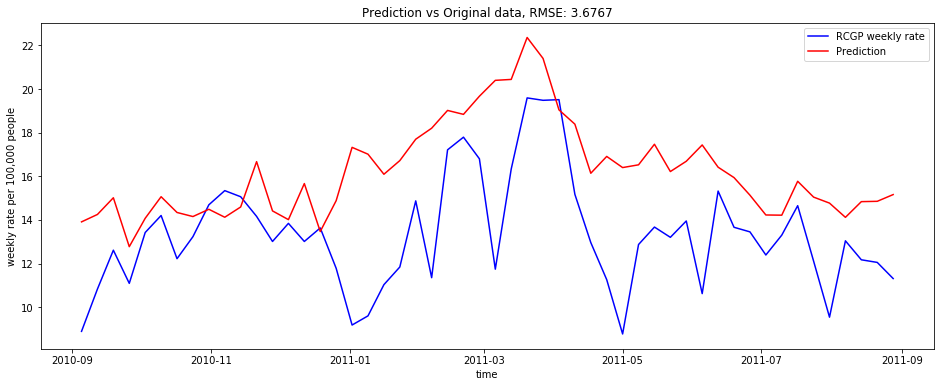

In [86]:
df2_gs = pd.DataFrame(predict_y_2, index = y_test_2.index, columns=['Prediction'])
plt.plot(y_test_2, color='blue',label='RCGP weekly rate')
plt.plot(df2_gs, color = 'red', label = 'Prediction')
plt.legend()
plt.xlabel('time')
plt.ylabel('weekly rate per 100,000 people')

rmse_2_gs = np.sqrt(np.mean((y_test_2.values - df2_gs.values)**2))
mse_2 = mean_squared_error(y_test_2,df2_gs)
#plt.title('Prediction vs Original data, RMSE: %.4f'% rmse_2_gs)
plt.title('Prediction vs Original data, RMSE: %.4f'% np.sqrt(mse_2))

In [88]:
m2_1 = pd.DataFrame(metrics(y_test_2,df2_gs).values, index=['Elastic net'],columns =['r','MSE','RMSE','MAE','MAPE'])
m2_1.iloc[:,0:5]

r        MSE      RMSE       MAE       MAPE
Elastic net  0.53086  13.518151  3.676704  2.979412  25.313326

In [89]:
# linear 2

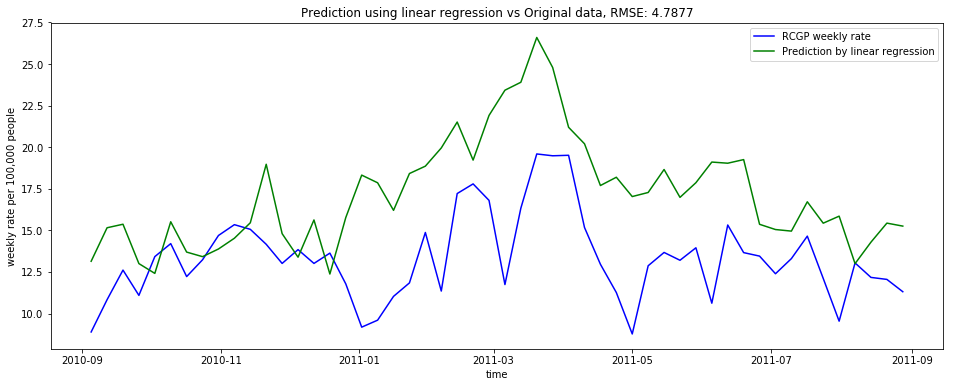

In [91]:
# linear regression (ordinary least square)

linear_2 = LinearRegression(fit_intercept= True)
linear_2.fit(X = x_train_2, y = y_train_2)
linear_train_2 = linear_2.predict(x_test_2)

l2 = pd.DataFrame(linear_train_2, index=y_test_2.index, columns=['Prediction'])

plt.plot(y_test_2, color='blue',label='RCGP weekly rate')
plt.plot(l2, color = 'green', label = 'Prediction by linear regression')
plt.legend()
plt.xlabel('time')
plt.ylabel('weekly rate per 100,000 people')

rmse_2 = np.sqrt(np.mean((y_test_2.values - l2.values)**2))
plt.title('Prediction using linear regression vs Original data, RMSE: %.4f'% rmse_2)

In [95]:
m2_2 = pd.DataFrame(metrics(y_test_2,l2).values, index=['Linear regression'],columns =['r','MSE','RMSE','MAE','MAPE'])
m2_2

r        MSE      RMSE       MAE       MAPE
Linear regression  0.520068  22.922215  4.787715  3.984251  32.505831

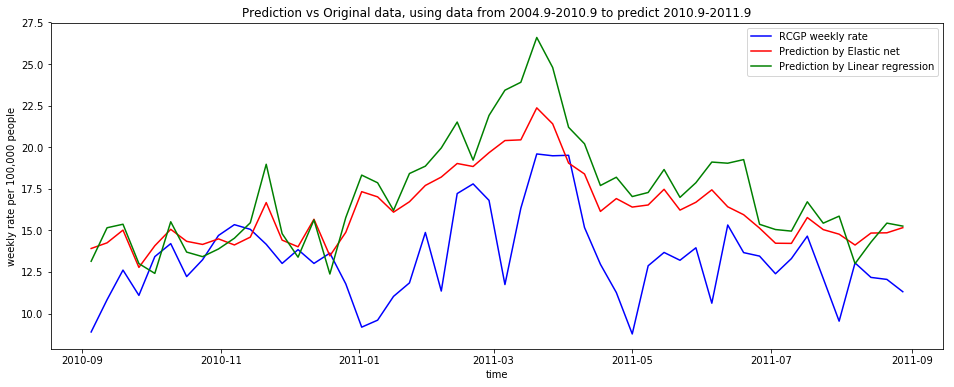

In [96]:
plt.plot(y_test_2, color='blue',label='RCGP weekly rate')
plt.plot(df2_gs, color = 'red', label = 'Prediction by Elastic net')
plt.plot(l2, color = 'green', label = 'Prediction by Linear regression')

plt.legend()
plt.xlabel('time')
plt.ylabel('weekly rate per 100,000 people')

plt.title('Prediction vs Original data, using data from 2004.9-2010.9 to predict 2010.9-2011.9')

In [97]:
p2= pd.concat([m2_2,m2_1])
p2.iloc[:,0:5]

r        MSE      RMSE       MAE       MAPE
Linear regression  0.520068  22.922215  4.787715  3.984251  32.505831
Elastic net        0.530860  13.518151  3.676704  2.979412  25.313326

In [98]:
# new prediction 2nd : 2005.9.1-2010.9.1 (5 years before prediction) -> 2010.9.1-2011.9.1(1 year)
train_line_2_n = pd.date_range(start= '2005-09-01', end= '2010-09-01') 
# test_line_2_n = pd.date_range(start= '2010-09-01',end = '2011-09-01') # --> test_line_2
x_train_2_n = gt_data.loc[train_line_2_n,:].dropna(0) 
y_train_2_n = rcgp_data.loc[train_line_2_n,:].dropna(0) 
# x_test_2_n = gt_data.loc[test_line_2_n,:].dropna(0) # --> x_test_2
# y_test_2_n = rcgp_data.loc[test_line_2_n,:].dropna(0) # --> y_test_2
parameters = {'alpha':[3],'l1_ratio':[0.5]}


# parameters = {'alpha':range(1,200,1),
#               'l1_ratio':[0.3,0.4,0.5,0.6,0.7]}
mycv2 = TimeSeriesSplit(n_splits =6)

clf_2_2 = GridSearchCV(ElasticNet(fit_intercept= True, max_iter=10000,tol =0.000001), param_grid=parameters,
                       scoring=make_scorer(mean_squared_error))
clf_2_2.fit(X = x_train_2_n, y = y_train_2_n)

predict_y_2_n = clf_2_2.best_estimator_.predict(x_test_2)
predict_y_2_n


array([ 14.34167918,  14.82337107,  15.10673136,  12.61658754,
        14.35814719,  15.5891896 ,  14.8551466 ,  14.04463751,
        15.1735838 ,  15.24730668,  15.15942545,  17.0917484 ,
        14.00728382,  13.74774422,  15.88289986,  13.39066795,
        14.56197636,  16.50174746,  16.33330987,  15.63442406,
        17.19503949,  17.26214526,  18.51137216,  20.36465511,
        18.8893672 ,  20.19416396,  21.27824574,  21.54427857,
        21.88841235,  21.73346467,  18.57692956,  17.95288155,
        14.52290286,  15.80855009,  15.0407191 ,  16.4479369 ,
        17.20094913,  16.36871479,  17.18628886,  17.28315106,
        16.28365386,  15.53939206,  14.82122995,  13.85808089,
        13.26077097,  15.25716572,  14.8384707 ,  13.81969735,
        13.72672966,  14.29324322,  14.65950558,  15.03770588])

In [99]:
clf_2_2.best_params_

{'alpha': 3, 'l1_ratio': 0.5}

In [100]:
weight_2_2 = clf_2_2.best_estimator_.coef_
pd.DataFrame(weight_2_2.reshape(1,62), columns= x_train_2_n.columns)

Abdominal cramps: (England)  Abdominal pain: (England)  \
0                         -0.0                  -0.025768   

   aching limbs: (England)  Adenovirus: (England)  anti nausea: (England)  \
0                      0.0              -0.007478                    -0.0   

   Antibiotics: (England)  autumn: (England)  barbecue: (England)  \
0                0.000128           -0.00392            -0.025432   

   bellyache: (England)  bloody diarrhoea: (England)  Diarrhea: (England)  \
0                   0.0                     0.001935             0.033017   

   Diarrhoea: (England)  Diarrhoea and vomiting: (England)  \
0                   0.0                           0.005741   

   Dulcolax: (England)  E coli: (England)  emesis: (England)  \
0            -0.015921           0.021213                0.0   

   feel sick: (England)  fever: (England)  Food poisoning: (England)  \
0             -0.003149              -0.0                       -0.0   

   Gastritis: (England)  Gastro intestinal: (England)  \
0                  -0.0                           0.0   

   Gastroenteritis: (England)  gastroenteritis contagious: (England)  \
0                    0.058239                                    0.0   

   gastroenteritis NHS: (England)  Gastroenteritis symptoms: (England)  \
0                       -0.002376                            -0.002108   

   Gastrointestinal: (England)  GI: (England)  Hand Hygiene: (England)  \
0                     0.013342      -0.009183                -0.010199   

   headache: (England)  infants: (England)  microorganisms: (England)  \
0             0.011715                 0.0                   0.013196   

   Nausea: (England)  NHS gastroenteritis: (England)  Norovirus: (England)  \
0                0.0                            -0.0             -0.002001   

   Norwalk: (England)  Norwalk virus: (England)  Ondansetron: (England)  \
0                 0.0                       0.0               -0.002286   

   Oral rehydration therapy: (England)  painful stomach cramps: (England)  \
0                             0.011004                               -0.0   

   Parasites: (England)  raw food: (England)  raw meat: (England)  \
0                  -0.0                  0.0                 -0.0   

   rota virus: (England)  Rotavirus vaccine: (England)  Rotavirus: (England)  \
0               0.024398                     -0.003632              0.029349   

   Salmonella: (England)  SASP: (England)  seafood: (England)  \
0                   -0.0              0.0                 0.0   

   spring: (England)  stomach ache: (England)  stomach flu: (England)  \
0           0.055733                     -0.0                     0.0   

   stomachache: (England)  summer: (England)  \
0                     0.0                0.0   

   Symptoms of gastroenteritis: (England)  throw up: (England)  \
0                                    -0.0                  0.0   

   viral gastroenteritis: (England)  vomit: (England)  vomiting: (England)  \
0                         -0.009587          0.028171                  0.0   

   winter: (England)  Winter vomiting: (England)  \
0           0.002381                         0.0   

   Winter vomiting bug: (England)  Zofran: (England)  
0                            -0.0          -0.012001

In [101]:
np.sum(weight_2_2!=0)

30

In [102]:
# w2_2 = pd.Series(weight_2_2, index = x_train_2.columns)
# w2_2.sort_values()

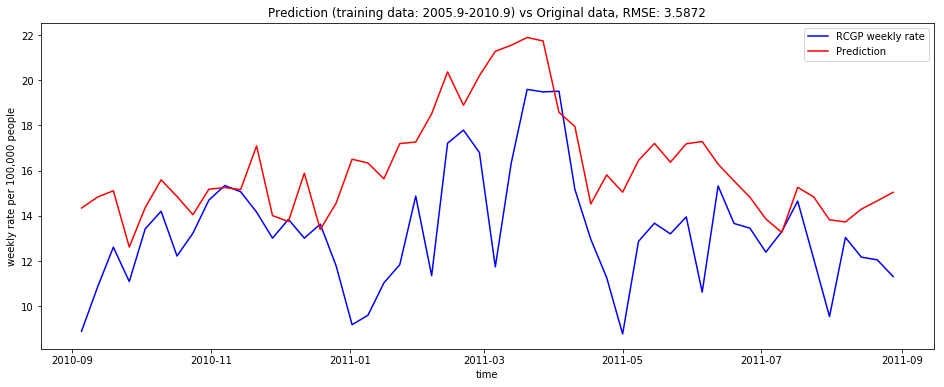

In [103]:
df2_gs_n = pd.DataFrame(predict_y_2_n, index=y_test_2.index, columns=['Prediction'])
pre2 = df2_gs_n
plt.plot(y_test_2, color='blue',label='RCGP weekly rate')
plt.plot(pre2, color = 'red', label = 'Prediction')
plt.legend()
plt.xlabel('time')
plt.ylabel('weekly rate per 100,000 people')

rmse_2_gs_n = np.sqrt(np.mean((y_test_2.values - df2_gs_n.values)**2))
#mse_2 = mean_squared_error(y_test_2,df2_gs)
plt.title('Prediction (training data: 2005.9-2010.9) vs Original data, RMSE: %.4f'% rmse_2_gs_n)
#plt.title('Prediction vs Original data, RMSE: %.4f'% np.sqrt(mse_2))

In [105]:
m2_3 = pd.DataFrame(metrics(y_test_2,df2_gs_n).values, index=['Elastic net version 2'],columns =['r','MSE','RMSE','MAE','MAPE'])
m2_3

r        MSE     RMSE       MAE       MAPE
Elastic net version 2  0.577823  12.868288  3.58724  2.867627  24.162673

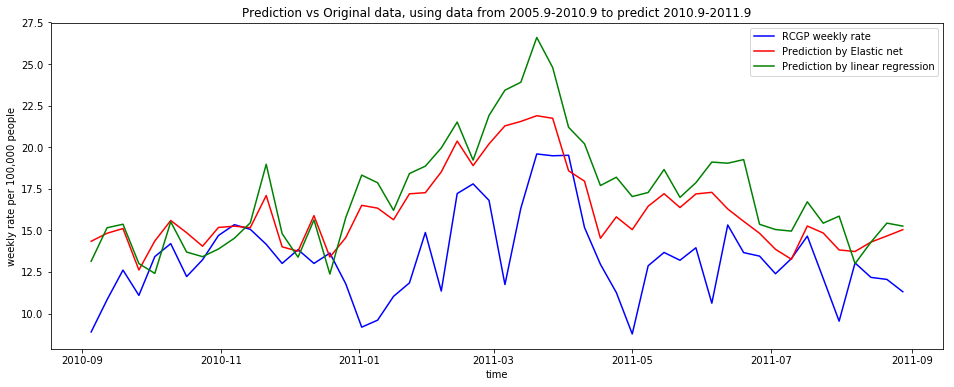

In [106]:
plt.plot(y_test_2, color='blue',label='RCGP weekly rate')
plt.plot(pre2, color = 'red', label = 'Prediction by Elastic net')
plt.plot(l2, color = 'green', label = 'Prediction by linear regression')

plt.legend()
plt.xlabel('time')
plt.ylabel('weekly rate per 100,000 people')

plt.title('Prediction vs Original data, using data from 2005.9-2010.9 to predict 2010.9-2011.9')

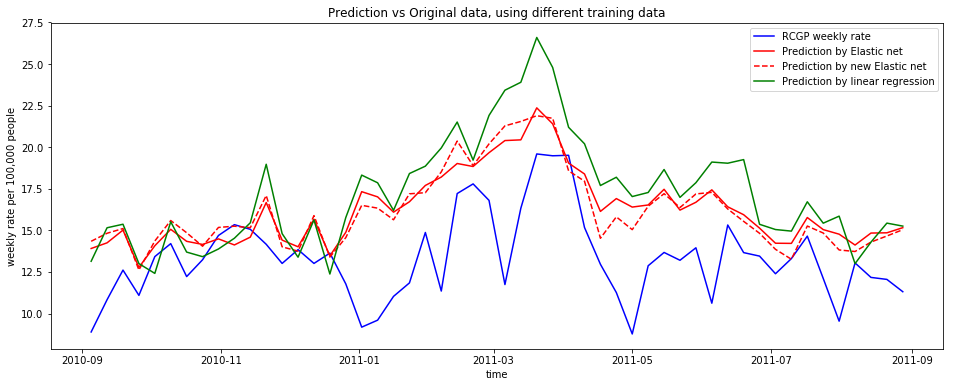

In [107]:
plt.plot(y_test_2, color='blue',label='RCGP weekly rate')
plt.plot(df2_gs, color = 'red', label = 'Prediction by Elastic net')
plt.plot(pre2, 'r--', label = 'Prediction by new Elastic net')
plt.plot(l2, color = 'green', label = 'Prediction by linear regression')

plt.legend()
plt.xlabel('time')
plt.ylabel('weekly rate per 100,000 people')

plt.title('Prediction vs Original data, using different training data')

In [108]:
pp2 =pd.concat([p2,m2_3])
pp2.iloc[:,0:5]

r        MSE      RMSE       MAE       MAPE
Linear regression      0.520068  22.922215  4.787715  3.984251  32.505831
Elastic net            0.530860  13.518151  3.676704  2.979412  25.313326
Elastic net version 2  0.577823  12.868288  3.587240  2.867627  24.162673

In [109]:
# elastic net 3

In [110]:
# 2004.9.1-2011.9.1 (7 years) -> 2011.9.1-2012.9.1 (1 year)
train_line_3 = pd.date_range(start= '2004-09-01', end='2011-09-01')
test_line_3 = pd.date_range(start='2011-09-01',end = '2012-09-01')
x_train_3 = gt_data.loc[train_line_3,:].dropna(0)
y_train_3 = rcgp_data.loc[train_line_3,:].dropna(0)
x_test_3 = gt_data.loc[test_line_3,:].dropna(0)
y_test_3 = rcgp_data.loc[test_line_3,:].dropna(0)


In [111]:
# 2004.9.1-2011.9.1 -> 2011.9.1-2012.9.1

#parameters = {'alpha':[1,10,20,30,40,50,60,70,80],'l1_ratio':[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
#parameters = {'alpha':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50,60,70,80,90,100],'l1_ratio':[0.5]}
# parameters = {'alpha':range(1,200,10),
#               'l1_ratio':[0.3,0.4,0.5,0.6,0.7]}
parameters = {'alpha':[2.5],'l1_ratio':[0.5]}

mycv3 = TimeSeriesSplit(n_splits =7)
#clf = GridSearchCV(ElasticNet(),param_grid=parameters, cv = mycv3)
clf_3 = GridSearchCV(ElasticNet(fit_intercept= True,max_iter=10000,tol =0.000001),param_grid=parameters,
                     scoring = make_scorer(mean_squared_error))
clf_3.fit(X = x_train_3, y = y_train_3)
predict_y_3 = clf_3.best_estimator_.predict(x_test_3)
predict_y_3

array([ 12.52840726,  13.28086585,  12.93446547,  13.006321  ,
        11.45602893,  13.20364653,  12.83051421,  13.52294721,
        13.04063017,  14.45598053,  14.77937049,  14.06910608,
        12.91081608,  13.93351544,  14.53749454,  13.63374268,
        14.51622613,  13.91996895,  14.97925748,  14.42269196,
        14.80648369,  15.81598719,  14.86524896,  15.24231245,
        17.02367217,  17.70290703,  17.20191745,  17.17454188,
        20.12814759,  17.08388469,  15.37764498,  15.37013182,
        15.2257664 ,  15.05122052,  15.92945808,  13.86391357,
        14.76249146,  12.41838979,  13.58440146,  11.61321672,
        12.39398349,  12.63665367,  13.52003177,  12.28896455,
        13.40918602,  11.81748075,  12.53036229,  11.89373282,
        11.76152876,  11.33564017,  10.96450811,  12.0110964 ])

In [112]:
clf_3.best_params_

{'alpha': 2.5, 'l1_ratio': 0.5}

In [113]:
weight_3 = clf_3.best_estimator_.coef_
pd.DataFrame(weight_3.reshape(1,62), columns= x_train_3.columns)


Abdominal cramps: (England)  Abdominal pain: (England)  \
0                    -0.006357                  -0.048853   

   aching limbs: (England)  Adenovirus: (England)  anti nausea: (England)  \
0                 0.000397              -0.005518               -0.003581   

   Antibiotics: (England)  autumn: (England)  barbecue: (England)  \
0                    -0.0               -0.0            -0.023971   

   bellyache: (England)  bloody diarrhoea: (England)  Diarrhea: (England)  \
0              0.000178                     0.001672             0.040565   

   Diarrhoea: (England)  Diarrhoea and vomiting: (England)  \
0                   0.0                           0.011223   

   Dulcolax: (England)  E coli: (England)  emesis: (England)  \
0            -0.013283           0.010883                0.0   

   feel sick: (England)  fever: (England)  Food poisoning: (England)  \
0             -0.020779              -0.0                       -0.0   

   Gastritis: (England)  Gastro intestinal: (England)  \
0                   0.0                          -0.0   

   Gastroenteritis: (England)  gastroenteritis contagious: (England)  \
0                    0.025981                                    0.0   

   gastroenteritis NHS: (England)  Gastroenteritis symptoms: (England)  \
0                       -0.000544                            -0.005491   

   Gastrointestinal: (England)  GI: (England)  Hand Hygiene: (England)  \
0                      0.01573      -0.001732                -0.000202   

   headache: (England)  infants: (England)  microorganisms: (England)  \
0             0.001414                 0.0                       -0.0   

   Nausea: (England)  NHS gastroenteritis: (England)  Norovirus: (England)  \
0               -0.0                            -0.0                  -0.0   

   Norwalk: (England)  Norwalk virus: (England)  Ondansetron: (England)  \
0                -0.0                 -0.001355                     0.0   

   Oral rehydration therapy: (England)  painful stomach cramps: (England)  \
0                             0.005031                                0.0   

   Parasites: (England)  raw food: (England)  raw meat: (England)  \
0             -0.000867                 -0.0             -0.00034   

   rota virus: (England)  Rotavirus vaccine: (England)  Rotavirus: (England)  \
0               0.015185                          -0.0              0.031068   

   Salmonella: (England)  SASP: (England)  seafood: (England)  \
0              -0.000657         0.000415                 0.0   

   spring: (England)  stomach ache: (England)  stomach flu: (England)  \
0           0.070667                -0.004424                    -0.0   

   stomachache: (England)  summer: (England)  \
0                    -0.0           0.013994   

   Symptoms of gastroenteritis: (England)  throw up: (England)  \
0                                     0.0            -0.000127   

   viral gastroenteritis: (England)  vomit: (England)  vomiting: (England)  \
0                         -0.010581          0.017777                  0.0   

   winter: (England)  Winter vomiting: (England)  \
0            0.01049                         0.0   

   Winter vomiting bug: (England)  Zofran: (England)  
0                       -0.001019          -0.009165

In [114]:
np.sum(weight_3!=0)

37

In [115]:
w3 = pd.Series(weight_3, index = x_train_3.columns)
w3.sort_values()


Abdominal pain: (England)                -0.048853
barbecue: (England)                      -0.023971
feel sick: (England)                     -0.020779
Dulcolax: (England)                      -0.013283
viral gastroenteritis: (England)         -0.010581
Zofran: (England)                        -0.009165
Abdominal cramps: (England)              -0.006357
Adenovirus: (England)                    -0.005518
Gastroenteritis symptoms: (England)      -0.005491
stomach ache: (England)                  -0.004424
anti nausea: (England)                   -0.003581
GI: (England)                            -0.001732
Norwalk virus: (England)                 -0.001355
Winter vomiting bug: (England)           -0.001019
Parasites: (England)                     -0.000867
Salmonella: (England)                    -0.000657
gastroenteritis NHS: (England)           -0.000544
raw meat: (England)                      -0.000340
Hand Hygiene: (England)                  -0.000202
throw up: (England)            

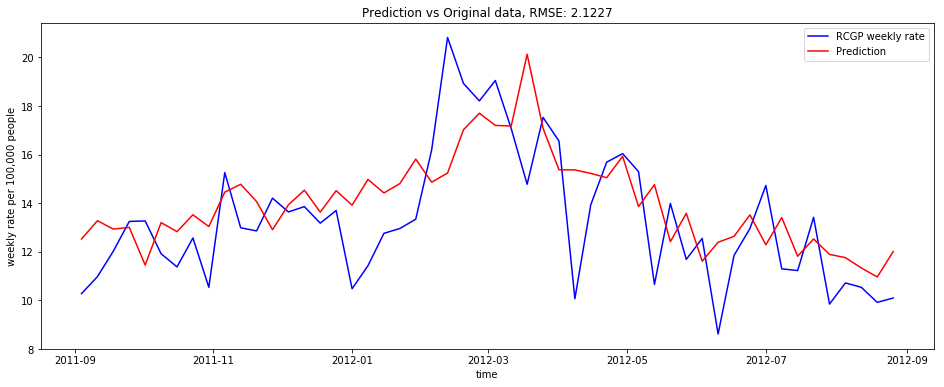

In [116]:
df3_gs = pd.DataFrame(predict_y_3, index=y_test_3.index, columns=['Prediction'])
plt.plot(y_test_3, color='blue',label='RCGP weekly rate')
plt.plot(df3_gs, color = 'red', label = 'Prediction')
plt.legend()
plt.xlabel('time')
plt.ylabel('weekly rate per 100,000 people')

rmse_3_gs = np.sqrt(np.mean((y_test_3.values - df3_gs.values)**2))
plt.title('Prediction vs Original data, RMSE: %.4f'% rmse_3_gs)

In [117]:
m3_1 = pd.DataFrame(metrics(y_test_3,df3_gs).values, index=['Elastic net'],columns =['r','MSE','RMSE','MAE','MAPE'])
m3_1

r       MSE      RMSE       MAE      MAPE
Elastic net  0.660853  4.506053  2.122747  1.683123  13.59856

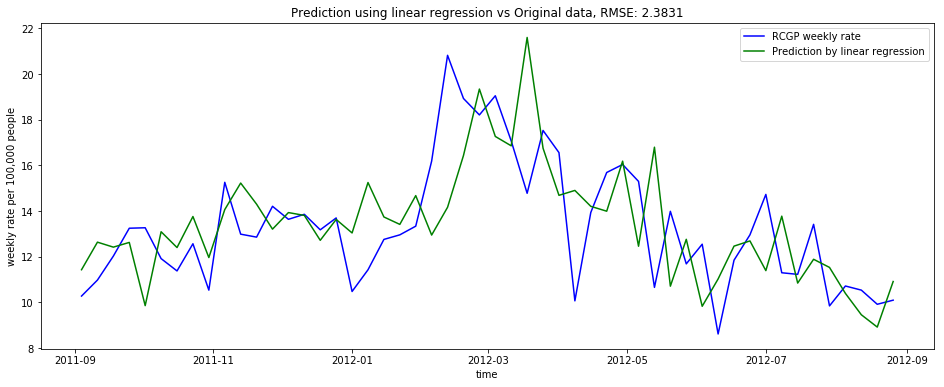

In [118]:
# linear regression (ordinary least square)

linear_3 = LinearRegression(fit_intercept= True)
linear_3.fit(X = x_train_3, y = y_train_3)
linear_train_3 = linear_3.predict(x_test_3)

l3 = pd.DataFrame(linear_train_3, index=y_test_3.index, columns=['Prediction'])

plt.plot(y_test_3, color='blue',label='RCGP weekly rate')
plt.plot(l3, color = 'green', label = 'Prediction by linear regression')
plt.legend()
plt.xlabel('time')
plt.ylabel('weekly rate per 100,000 people')

rmse_3 = np.sqrt(np.mean((y_test_3.values - l3.values)**2))
plt.title('Prediction using linear regression vs Original data, RMSE: %.4f'% rmse_3)

In [122]:
m3_2 = pd.DataFrame(metrics(y_test_3,l3).values, index=['Linear regression'],columns =['r','MSE','RMSE','MAE','MAPE'])
m3_2


r       MSE      RMSE      MAE       MAPE
Linear regression  0.563306  5.679267  2.383121  1.76633  13.648798

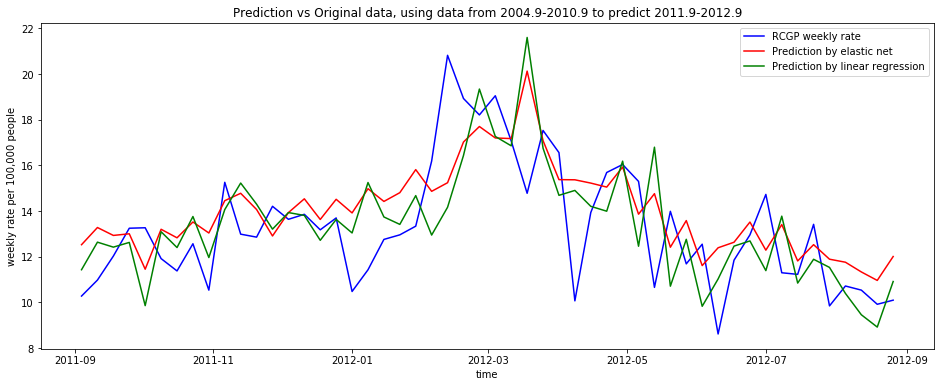

In [123]:
plt.plot(y_test_3, color='blue',label='RCGP weekly rate')
plt.plot(df3_gs, color = 'red', label = 'Prediction by elastic net')
plt.plot(l3, color = 'green', label = 'Prediction by linear regression')

plt.legend()
plt.xlabel('time')
plt.ylabel('weekly rate per 100,000 people')

plt.title('Prediction vs Original data, using data from 2004.9-2010.9 to predict 2011.9-2012.9')

In [124]:
p3 = pd.concat([m3_2,m3_1])
p3.iloc[:,:5]

r       MSE      RMSE       MAE       MAPE
Linear regression  0.563306  5.679267  2.383121  1.766330  13.648798
Elastic net        0.660853  4.506053  2.122747  1.683123  13.598560

In [125]:
# new training data for 3rd prediction
# 2006.9.1-2011.9.1 (5 years) -> 2011.9.1-2012.9.1 (1 year)
train_line_3 = pd.date_range(start= '2006-09-01', end='2011-09-01')
test_line_3 = pd.date_range(start='2011-09-01',end = '2012-09-01')
x_train_3 = gt_data.loc[train_line_3,:].dropna(0)
y_train_3 = rcgp_data.loc[train_line_3,:].dropna(0)
x_test_3 = gt_data.loc[test_line_3,:].dropna(0)
y_test_3 = rcgp_data.loc[test_line_3,:].dropna(0)


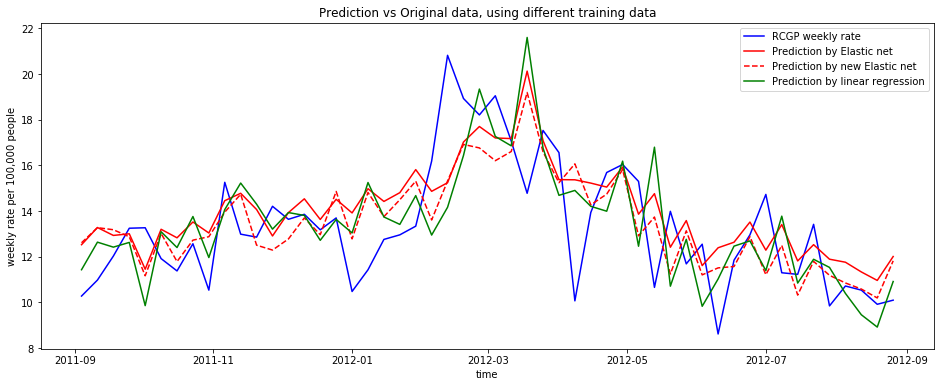

In [126]:
parameters = {'alpha':[2.5],'l1_ratio':[0.5]}

clf_3_n = GridSearchCV(ElasticNet(fit_intercept= True,max_iter=10000,tol=0.000001),param_grid=parameters,
                     scoring=make_scorer(mean_squared_error))
clf_3_n.fit(X = x_train_3, y = y_train_3)
pre_3 =clf_3_n.best_estimator_.predict(x_test_3)
clf_3_n.best_params_

pre3 = pd.DataFrame(pre_3, index=y_test_3.index, columns=['Prediction'])

plt.plot(y_test_3, color='blue',label='RCGP weekly rate')
plt.plot(df3_gs, color = 'red', label = 'Prediction by Elastic net')
plt.plot(pre3, 'r--', label = 'Prediction by new Elastic net')
plt.plot(l3, color = 'green', label = 'Prediction by linear regression')

plt.legend()
plt.xlabel('time')
plt.ylabel('weekly rate per 100,000 people')

plt.title('Prediction vs Original data, using different training data')


In [127]:
m3_3 = pd.DataFrame(metrics(y_test_3,pre3).values, index=['Elastic net version 2'],columns =['r','MSE','RMSE','MAE','MAPE'])
m3_3

r       MSE      RMSE      MAE       MAPE
Elastic net version 2  0.6312  4.342123  2.083776  1.61901  12.585504

In [128]:
pp3= pd.concat([p3,m3_3])
pp3

r       MSE      RMSE       MAE       MAPE
Linear regression      0.563306  5.679267  2.383121  1.766330  13.648798
Elastic net            0.660853  4.506053  2.122747  1.683123  13.598560
Elastic net version 2  0.631200  4.342123  2.083776  1.619010  12.585504

In [129]:
pp3.iloc[:,:5]

r       MSE      RMSE       MAE       MAPE
Linear regression      0.563306  5.679267  2.383121  1.766330  13.648798
Elastic net            0.660853  4.506053  2.122747  1.683123  13.598560
Elastic net version 2  0.631200  4.342123  2.083776  1.619010  12.585504

In [130]:
# elastic net 4

In [131]:
# 2004.9.1-2012.9.1 (8 years) -> 2012.9.1-2013.9.1 (1 year)
train_line_4 = pd.date_range(start= '2004-09-01', end='2012-09-01')
test_line_4 = pd.date_range(start='2012-09-01',end = '2013-09-01')
x_train_4 = gt_data.loc[train_line_4,:].dropna(0)
y_train_4 = rcgp_data.loc[train_line_4,:].dropna(0)
x_test_4 = gt_data.loc[test_line_4,:].dropna(0)
y_test_4 = rcgp_data.loc[test_line_4,:].dropna(0)


In [132]:
# 2004.9.1-2012.9.1 -> 2012.9.1-2013.9.1

#parameters = {'alpha':[0,10,20,30,40,50,60,70,80,90,100],'l1_ratio':[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
#parameters = {'alpha':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50,60,70,80,90,100],'l1_ratio':[0.5]}
# parameters = {'alpha':range(1,200,10),
#               'l1_ratio':[0.3,0.4,0.5,0.6,0.7]}
parameters = {'alpha':[4],'l1_ratio':[0.5]}

mycv4 = TimeSeriesSplit(n_splits =8)

clf_4 = GridSearchCV(ElasticNet(fit_intercept= True,max_iter=10000,tol=0.000001),param_grid=parameters,
                     scoring = make_scorer(mean_squared_error))
clf_4.fit(X = x_train_4, y = y_train_4)
predict_y_4 = clf_4.best_estimator_.predict(x_test_4)
predict_y_4

array([ 10.43201791,  10.84712553,  11.23229815,  11.06033536,
        10.70667659,  11.0281111 ,  10.95035403,  11.02633233,
        11.83083941,  12.20320427,  11.58966505,  11.52768083,
        11.57837099,  11.0432479 ,  11.35847664,  10.63633028,
        10.9546829 ,  10.85160138,   9.87782701,  10.74110958,
        11.14248345,  12.92941349,  12.19756492,  10.93586418,
        12.21315491,  13.2681686 ,  13.835301  ,  12.91217966,
        14.61442564,  13.64324722,  13.94440766,  12.94457211,
        12.05814748,  12.06297006,  11.6888803 ,  11.19072364,
        10.91019814,  11.20007108,  11.37430233,  10.81071816,
        10.07434737,  10.31991493,  10.92261888,  10.36104436,
        10.50282155,  15.09700747,  10.69402833,  10.90329805,
        10.33792213,  10.8848194 ,  10.26866388,  10.78060942,  10.30361096])

In [133]:
clf_4.best_params_

{'alpha': 4, 'l1_ratio': 0.5}

In [134]:
weight_4 = clf_4.best_estimator_.coef_
pd.DataFrame(weight_4.reshape(1,62), columns= x_train_4.columns)

Abdominal cramps: (England)  Abdominal pain: (England)  \
0                         -0.0                  -0.044257   

   aching limbs: (England)  Adenovirus: (England)  anti nausea: (England)  \
0                      0.0              -0.003146               -0.006369   

   Antibiotics: (England)  autumn: (England)  barbecue: (England)  \
0                     0.0               -0.0            -0.016703   

   bellyache: (England)  bloody diarrhoea: (England)  Diarrhea: (England)  \
0                   0.0                     0.000846             0.032891   

   Diarrhoea: (England)  Diarrhoea and vomiting: (England)  \
0                   0.0                           0.007896   

   Dulcolax: (England)  E coli: (England)  emesis: (England)  \
0            -0.015531           0.007332                0.0   

   feel sick: (England)  fever: (England)  Food poisoning: (England)  \
0             -0.016157               0.0                       -0.0   

   Gastritis: (England)  Gastro intestinal: (England)  \
0                  -0.0                          -0.0   

   Gastroenteritis: (England)  gastroenteritis contagious: (England)  \
0                    0.015566                                    0.0   

   gastroenteritis NHS: (England)  Gastroenteritis symptoms: (England)  \
0                            -0.0                            -0.000844   

   Gastrointestinal: (England)  GI: (England)  Hand Hygiene: (England)  \
0                     0.006912           -0.0                     -0.0   

   headache: (England)  infants: (England)  microorganisms: (England)  \
0                  0.0                 0.0                        0.0   

   Nausea: (England)  NHS gastroenteritis: (England)  Norovirus: (England)  \
0               -0.0                            -0.0                   0.0   

   Norwalk: (England)  Norwalk virus: (England)  Ondansetron: (England)  \
0                -0.0                      -0.0                    -0.0   

   Oral rehydration therapy: (England)  painful stomach cramps: (England)  \
0                             0.004415                               -0.0   

   Parasites: (England)  raw food: (England)  raw meat: (England)  \
0                  -0.0                 -0.0                 -0.0   

   rota virus: (England)  Rotavirus vaccine: (England)  Rotavirus: (England)  \
0                0.01122                          -0.0               0.03485   

   Salmonella: (England)  SASP: (England)  seafood: (England)  \
0                   -0.0              0.0                -0.0   

   spring: (England)  stomach ache: (England)  stomach flu: (England)  \
0           0.048956                -0.000309                     0.0   

   stomachache: (England)  summer: (England)  \
0                    -0.0                0.0   

   Symptoms of gastroenteritis: (England)  throw up: (England)  \
0                                     0.0                 -0.0   

   viral gastroenteritis: (England)  vomit: (England)  vomiting: (England)  \
0                         -0.007465          0.012119                  0.0   

   winter: (England)  Winter vomiting: (England)  \
0           0.000255                         0.0   

   Winter vomiting bug: (England)  Zofran: (England)  
0                             0.0          -0.004721

In [135]:
np.sum(weight_4!=0)

22

In [136]:
w4 = pd.Series(weight_4, index = x_train_4.columns)
w4.sort_values()


Abdominal pain: (England)                -0.044257
barbecue: (England)                      -0.016703
feel sick: (England)                     -0.016157
Dulcolax: (England)                      -0.015531
viral gastroenteritis: (England)         -0.007465
anti nausea: (England)                   -0.006369
Zofran: (England)                        -0.004721
Adenovirus: (England)                    -0.003146
Gastroenteritis symptoms: (England)      -0.000844
stomach ache: (England)                  -0.000309
raw food: (England)                      -0.000000
Parasites: (England)                     -0.000000
Ondansetron: (England)                   -0.000000
raw meat: (England)                      -0.000000
Norwalk virus: (England)                 -0.000000
Norwalk: (England)                       -0.000000
Norovirus: (England)                      0.000000
painful stomach cramps: (England)        -0.000000
Rotavirus vaccine: (England)             -0.000000
seafood: (England)             

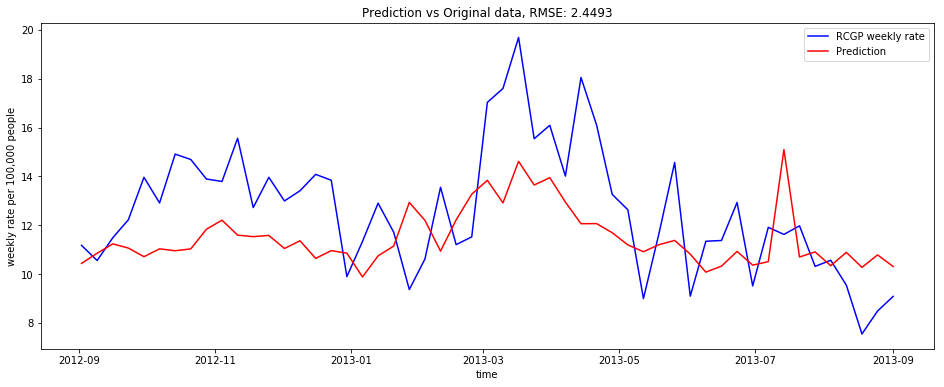

In [137]:
df4_gs = pd.DataFrame(predict_y_4, index=y_test_4.index, columns=['Prediction'])
plt.plot(y_test_4, color='blue',label='RCGP weekly rate')
plt.plot(df4_gs, color = 'red', label = 'Prediction')
plt.legend()
plt.xlabel('time')
plt.ylabel('weekly rate per 100,000 people')

rmse_4_gs = np.sqrt(np.mean((y_test_4.values - df4_gs.values)**2))
plt.title('Prediction vs Original data, RMSE: %.4f'% rmse_4_gs)

In [138]:
m4_1 = pd.DataFrame(metrics(y_test_4,df4_gs).values, index=['Elastic net'],columns =['r','MSE','RMSE','MAE','MAPE'])
m4_1


r       MSE      RMSE       MAE       MAPE
Elastic net  0.527274  5.999247  2.449336  2.085853  16.097235

In [139]:
# linear 4

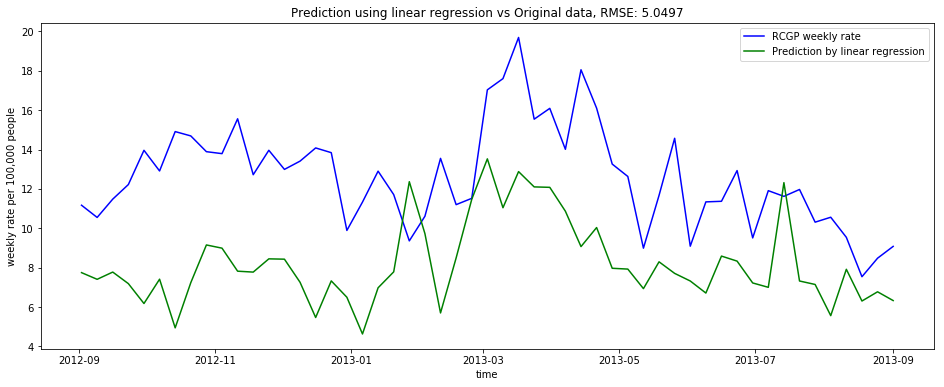

In [140]:
# linear regression (ordinary least square regression)

linear_4 = LinearRegression(fit_intercept= True)
linear_4.fit(X = x_train_4, y = y_train_4)
linear_train_4 = linear_4.predict(x_test_4)

l4 = pd.DataFrame(linear_train_4, index=y_test_4.index, columns=['Prediction'])

plt.plot(y_test_4, color='blue',label='RCGP weekly rate')
plt.plot(l4, color = 'green', label = 'Prediction by linear regression')
plt.legend()
plt.xlabel('time')
plt.ylabel('weekly rate per 100,000 people')

rmse_4 = np.sqrt(np.mean((y_test_4.values - l4.values)**2))
plt.title('Prediction using linear regression vs Original data, RMSE: %.4f'% rmse_4)

In [142]:
m4_2 = pd.DataFrame(metrics(y_test_4,l4).values, index=['Linear regression'],columns =['r','MSE','RMSE','MAE','MAPE'])
m4_2


r        MSE      RMSE       MAE       MAPE
Linear regression  0.438601  25.499387  5.049692  4.539459  34.893337

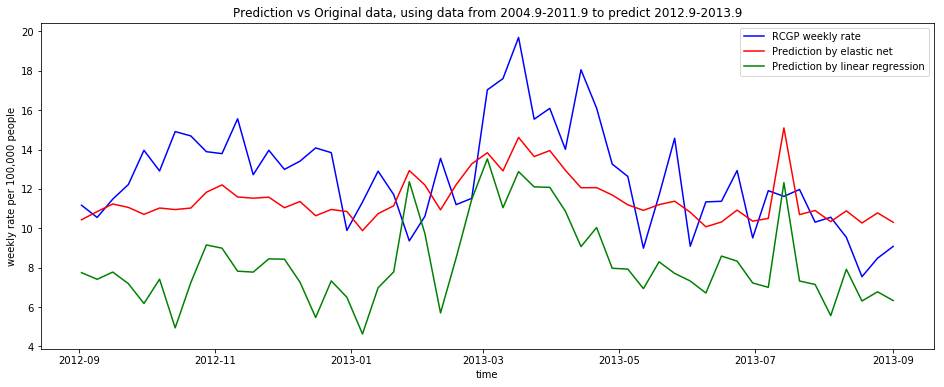

In [143]:
plt.plot(y_test_4, color='blue',label='RCGP weekly rate')
plt.plot(df4_gs, color = 'red', label = 'Prediction by elastic net')
plt.plot(l4, color = 'green', label = 'Prediction by linear regression')

plt.legend()
plt.xlabel('time')
plt.ylabel('weekly rate per 100,000 people')

plt.title('Prediction vs Original data, using data from 2004.9-2011.9 to predict 2012.9-2013.9')

In [144]:
p4 = pd.concat([m4_2,m4_1])
p4.iloc[:,:5]

r        MSE      RMSE       MAE       MAPE
Linear regression  0.438601  25.499387  5.049692  4.539459  34.893337
Elastic net        0.527274   5.999247  2.449336  2.085853  16.097235

In [145]:
#new training data

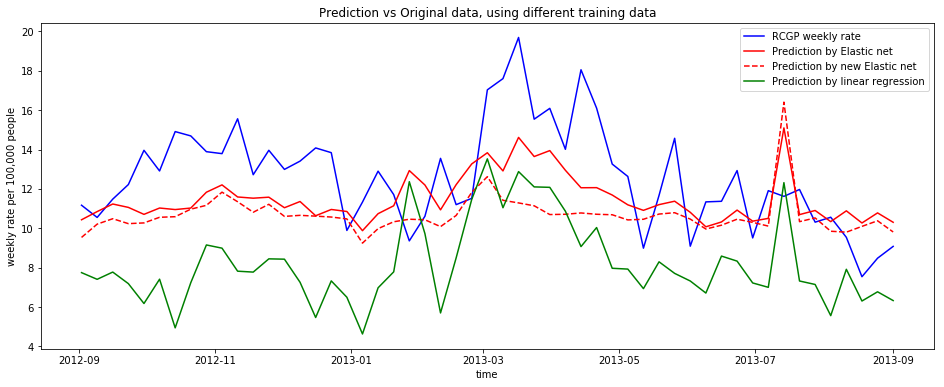

In [146]:
# 2007.9.1-2012.9.1 (5 years) -> 2012.9.1-2013.9.1 (1 year)
train_line_4 = pd.date_range(start= '2007-09-01', end='2012-09-01')
test_line_4 = pd.date_range(start='2012-09-01',end = '2013-09-01')
x_train_4 = gt_data.loc[train_line_4,:].dropna(0)
y_train_4 = rcgp_data.loc[train_line_4,:].dropna(0)
x_test_4 = gt_data.loc[test_line_4,:].dropna(0)
y_test_4 = rcgp_data.loc[test_line_4,:].dropna(0)

#plot the model on training data
#parameters = {'alpha':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50,60,70,80,90,100],'l1_ratio':[0.5]}
parameters = {'alpha':[7.5],'l1_ratio':[0.5]}

clf_4_n = GridSearchCV(ElasticNet(fit_intercept= True,max_iter=10000,tol=0.000005),param_grid=parameters,
                     scoring=make_scorer(mean_squared_error))
clf_4_n.fit(X = x_train_4, y = y_train_4)
pre_4 =clf_4_n.best_estimator_.predict(x_test_4)
clf_4_n.best_params_

pre4 = pd.DataFrame(pre_4, index=y_test_4.index, columns=['Prediction'])

plt.plot(y_test_4, color='blue',label='RCGP weekly rate')
plt.plot(df4_gs, color = 'red', label = 'Prediction by Elastic net')
plt.plot(pre4, 'r--', label = 'Prediction by new Elastic net')
plt.plot(l4, color = 'green', label = 'Prediction by linear regression')

plt.legend()
plt.xlabel('time')
plt.ylabel('weekly rate per 100,000 people')

plt.title('Prediction vs Original data, using different training data')


In [147]:
m4_3 = pd.DataFrame(metrics(y_test_4,pre4).values, index=['Elastic net v2'],columns =['r','MSE','RMSE','MAE','MAPE'])
m4_3

r       MSE      RMSE       MAE       MAPE
Elastic net v2  0.296449  9.710284  3.116133  2.538878  18.697522

In [148]:
pp4=pd.concat([p4,m4_3])
pp4.iloc[:,:5]

r        MSE      RMSE       MAE       MAPE
Linear regression  0.438601  25.499387  5.049692  4.539459  34.893337
Elastic net        0.527274   5.999247  2.449336  2.085853  16.097235
Elastic net v2     0.296449   9.710284  3.116133  2.538878  18.697522

In [149]:
# elastic net 5

In [150]:
# 2004.9.1-2013.9.1 (9 years) -> 2013.9.1-2014.9.1 (1 year)
train_line_5 = pd.date_range(start= '2004-09-02', end='2013-09-01')
test_line_5 = pd.date_range(start='2013-09-02',end = '2014-09-01')
x_train_5 = gt_data.loc[train_line_5,:].dropna(0)
y_train_5 = rcgp_data.loc[train_line_5,:].dropna(0)
x_test_5 = gt_data.loc[test_line_5,:].dropna(0)
y_test_5 = rcgp_data.loc[test_line_5,:].dropna(0)


In [151]:
# 2004.9.1-2013.9.1 -> 2013.9.1-2014.9.1
#parameters = {'alpha':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50,60,70,80,90,100],'l1_ratio':[0.5]}

# parameters = {'alpha':range(1,200,1),
#               'l1_ratio':[0.3,0.4,0.5,0.6,0.7]}
parameters = {'alpha':[1],'l1_ratio':[0.5]}

mycv5 = TimeSeriesSplit(n_splits = 9)
#clf = GridSearchCV(ElasticNet(),param_grid=parameters, cv = mycv5)
clf_5 = GridSearchCV(ElasticNet(fit_intercept= True,max_iter=10000,tol=0.000001),param_grid=parameters,
                     scoring=make_scorer(mean_squared_error))
clf_5.fit(X = x_train_5, y = y_train_5)
predict_y_5 = clf_5.best_estimator_.predict(x_test_5)
predict_y_5

array([ 11.77671683,  10.76181083,  10.73340293,  11.34701839,
        11.19874068,  10.43963758,  11.02627359,  11.29006439,
        11.57639315,  11.49957454,  12.70086429,  12.73317774,
        13.02019977,  12.94825475,  12.22364345,  10.54829516,
        11.42497392,  11.88327068,  11.53371646,  11.67037662,
        12.01411458,  13.22749789,  13.03540554,  13.2608406 ,
        13.67818537,  12.25268563,  13.80733326,  15.03429378,
        13.23155464,  13.28243545,  12.54719321,  11.36571602,
        12.43130652,  12.24549598,  11.45784407,  12.26175957,
        11.56374956,  11.13703867,  10.928459  ,  10.90838628,
        10.13598507,  10.36583327,  11.84210294,  10.73505832,
        10.16446374,  11.80579458,   9.91930205,  11.81293714,
         9.44820337,  11.19655279,  10.56864449,  11.05080035])

In [152]:
clf_5.best_params_

{'alpha': 1, 'l1_ratio': 0.5}

In [153]:
weight_5 = clf_5.best_estimator_.coef_
pd.DataFrame(weight_5.reshape(1,62), columns= x_train_5.columns)

Abdominal cramps: (England)  Abdominal pain: (England)  \
0                    -0.003653                  -0.049963   

   aching limbs: (England)  Adenovirus: (England)  anti nausea: (England)  \
0                 0.000521              -0.008275               -0.004871   

   Antibiotics: (England)  autumn: (England)  barbecue: (England)  \
0               -0.000442               -0.0            -0.026429   

   bellyache: (England)  bloody diarrhoea: (England)  Diarrhea: (England)  \
0              0.003323                     0.005245             0.045456   

   Diarrhoea: (England)  Diarrhoea and vomiting: (England)  \
0              0.006098                            0.01538   

   Dulcolax: (England)  E coli: (England)  emesis: (England)  \
0            -0.019555           0.021659            0.00708   

   feel sick: (England)  fever: (England)  Food poisoning: (England)  \
0             -0.023366          0.000542                        0.0   

   Gastritis: (England)  Gastro intestinal: (England)  \
0              0.005792                           0.0   

   Gastroenteritis: (England)  gastroenteritis contagious: (England)  \
0                     0.02779                               -0.00021   

   gastroenteritis NHS: (England)  Gastroenteritis symptoms: (England)  \
0                            -0.0                            -0.005833   

   Gastrointestinal: (England)  GI: (England)  Hand Hygiene: (England)  \
0                     0.014025       -0.00334                -0.000651   

   headache: (England)  infants: (England)  microorganisms: (England)  \
0                  0.0                 0.0                   0.001683   

   Nausea: (England)  NHS gastroenteritis: (England)  Norovirus: (England)  \
0                0.0                       -0.002285                   0.0   

   Norwalk: (England)  Norwalk virus: (England)  Ondansetron: (England)  \
0                 0.0                      -0.0               -0.000385   

   Oral rehydration therapy: (England)  painful stomach cramps: (England)  \
0                              0.01109                           0.002348   

   Parasites: (England)  raw food: (England)  raw meat: (England)  \
0             -0.002098            -0.009336                 -0.0   

   rota virus: (England)  Rotavirus vaccine: (England)  Rotavirus: (England)  \
0               0.010429                      -0.00552              0.027041   

   Salmonella: (England)  SASP: (England)  seafood: (England)  \
0              -0.005843         0.002188                 0.0   

   spring: (England)  stomach ache: (England)  stomach flu: (England)  \
0           0.081789                 -0.01296                0.001718   

   stomachache: (England)  summer: (England)  \
0                0.002922           0.018912   

   Symptoms of gastroenteritis: (England)  throw up: (England)  \
0                                0.007654            -0.004896   

   viral gastroenteritis: (England)  vomit: (England)  vomiting: (England)  \
0                          -0.00876          0.011106             0.004205   

   winter: (England)  Winter vomiting: (England)  \
0           0.012266                    0.011085   

   Winter vomiting bug: (England)  Zofran: (England)  
0                       -0.009223          -0.004826

In [154]:
np.sum(weight_5!=0)

50

In [155]:
w5 = pd.Series(weight_5, index = x_train_5.columns)
w5.sort_values()



Abdominal pain: (England)                -0.049963
barbecue: (England)                      -0.026429
feel sick: (England)                     -0.023366
Dulcolax: (England)                      -0.019555
stomach ache: (England)                  -0.012960
raw food: (England)                      -0.009336
Winter vomiting bug: (England)           -0.009223
viral gastroenteritis: (England)         -0.008760
Adenovirus: (England)                    -0.008275
Salmonella: (England)                    -0.005843
Gastroenteritis symptoms: (England)      -0.005833
Rotavirus vaccine: (England)             -0.005520
throw up: (England)                      -0.004896
anti nausea: (England)                   -0.004871
Zofran: (England)                        -0.004826
Abdominal cramps: (England)              -0.003653
GI: (England)                            -0.003340
NHS gastroenteritis: (England)           -0.002285
Parasites: (England)                     -0.002098
Hand Hygiene: (England)        

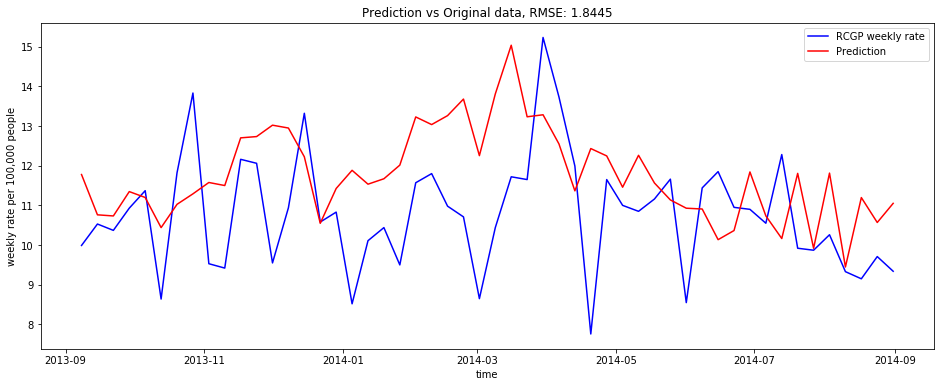

In [156]:
df5_gs = pd.DataFrame(predict_y_5, index=y_test_5.index, columns=['Prediction'])
plt.plot(y_test_5, color='blue',label='RCGP weekly rate')
plt.plot(df5_gs, color = 'red', label = 'Prediction')
plt.legend()
plt.xlabel('time')
plt.ylabel('weekly rate per 100,000 people')

rmse_5_gs = np.sqrt(np.mean((y_test_5.values - df5_gs.values)**2))
plt.title('Prediction vs Original data, RMSE: %.4f'% rmse_5_gs)

In [157]:

m5_1 = pd.DataFrame(metrics(y_test_5,df5_gs).values, index=['Elastic net'],columns =['r','MSE','RMSE','MAE','MAPE'])
m5_1

r       MSE      RMSE       MAE     MAPE
Elastic net  0.249859  3.402009  1.844453  1.493755  14.6248

In [278]:
# linear 5

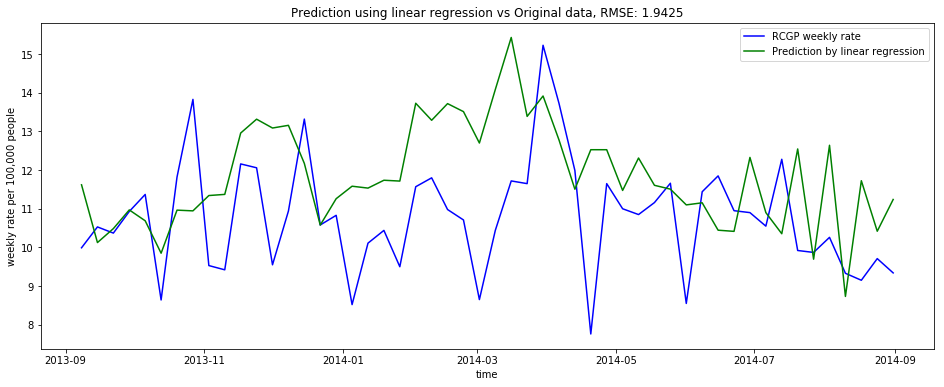

In [158]:
# linear regression (ordinary least square)

linear_5 = LinearRegression(fit_intercept= True)
linear_5.fit(X = x_train_5, y = y_train_5)
linear_train_5 = linear_5.predict(x_test_5)

l5 = pd.DataFrame(linear_train_5, index=y_test_5.index, columns=['Prediction'])

plt.plot(y_test_5, color='blue',label='RCGP weekly rate')
plt.plot(l5, color = 'green', label = 'Prediction by linear regression')
plt.legend()
plt.xlabel('time')
plt.ylabel('weekly rate per 100,000 people')

rmse_5 = np.sqrt(np.mean((y_test_5.values - l5.values)**2))
plt.title('Prediction using linear regression vs Original data, RMSE: %.4f'% rmse_5)

In [159]:
m5_2 = pd.DataFrame(metrics(y_test_5,l5).values, index=['Linear regression'],columns =['r','MSE','RMSE','MAE','MAPE'])
m5_2

r       MSE      RMSE       MAE       MAPE
Linear regression  0.279536  3.773129  1.942454  1.571026  15.374183

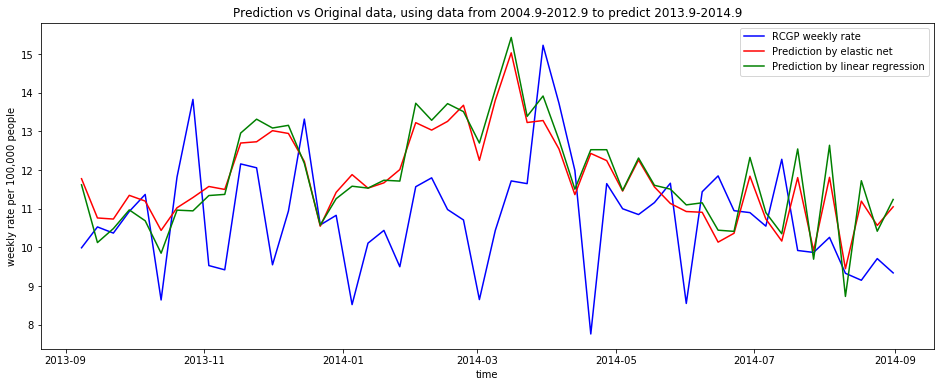

In [160]:
plt.plot(y_test_5, color='blue',label='RCGP weekly rate')
plt.plot(df5_gs, color = 'red', label = 'Prediction by elastic net')
plt.plot(l5, color = 'green', label = 'Prediction by linear regression')

plt.legend()
plt.xlabel('time')
plt.ylabel('weekly rate per 100,000 people')

plt.title('Prediction vs Original data, using data from 2004.9-2012.9 to predict 2013.9-2014.9')

In [161]:
p5 =pd.concat([m5_2,m5_1])
p5.iloc[:,:5]


r       MSE      RMSE       MAE       MAPE
Linear regression  0.279536  3.773129  1.942454  1.571026  15.374183
Elastic net        0.249859  3.402009  1.844453  1.493755  14.624800

In [162]:
# new training data 5

In [163]:
# 2008.9.1-2013.9.1 (5 years) -> 2013.9.1-2014.9.1 (1 year)
train_line_5 = pd.date_range(start= '2008-09-02', end='2013-09-01')
test_line_5 = pd.date_range(start='2013-09-02',end = '2014-09-01')
x_train_5 = gt_data.loc[train_line_5,:].dropna(0)
y_train_5 = rcgp_data.loc[train_line_5,:].dropna(0)
x_test_5 = gt_data.loc[test_line_5,:].dropna(0)
y_test_5 = rcgp_data.loc[test_line_5,:].dropna(0)

#plot the model on training data
#parameters = {'alpha':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50,60,70,80,90,100],'l1_ratio':[0.5]}
# parameters = {'alpha':range(1,200,10),
#               'l1_ratio':[0.3,0.4,0.5,0.6,0.7]}
parameters = {'alpha':[1],'l1_ratio':[0.5]}

clf_5_n = GridSearchCV(ElasticNet(fit_intercept= True,max_iter=10000,tol=0.000005),param_grid=parameters,
                     scoring=make_scorer(mean_absolute_error))
clf_5_n.fit(X = x_train_5, y = y_train_5)
pre_5 =clf_5_n.best_estimator_.predict(x_test_5)
clf_5_n.best_params_



{'alpha': 1, 'l1_ratio': 0.5}

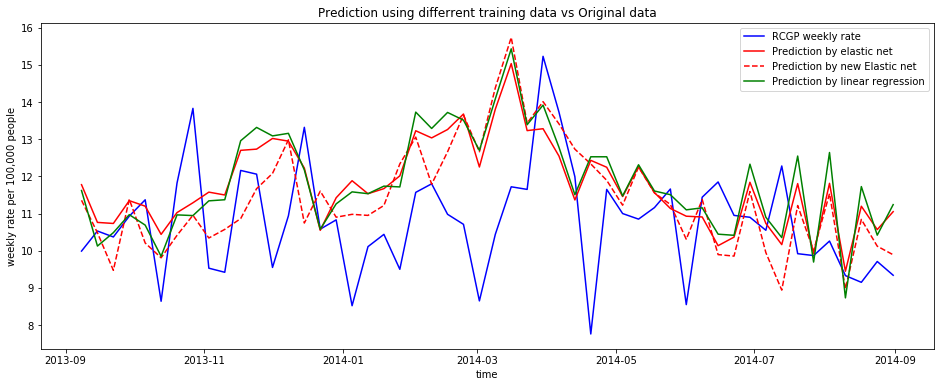

In [164]:
pre5 = pd.DataFrame(pre_5, index=y_test_5.index, columns=['Prediction'])

plt.plot(y_test_5, color='blue',label='RCGP weekly rate')
plt.plot(df5_gs, color = 'red', label = 'Prediction by elastic net')
plt.plot(pre5, 'r--', label = 'Prediction by new Elastic net')

plt.plot(l5, color = 'green', label = 'Prediction by linear regression')

plt.legend()
plt.xlabel('time')
plt.ylabel('weekly rate per 100,000 people')

rmse_5= np.sqrt(np.mean((y_test_5.values - pre5.values)**2))
plt.title('Prediction using differrent training data vs Original data')

In [165]:
#m5_3 = metrics(y_test_5,pre5)
m5_3 = pd.DataFrame(metrics(y_test_5,pre5).values, index=['Elastic net version 2'],columns =['r','MSE','RMSE','MAE','MAPE'])


In [166]:
pp5 = pd.concat([p5,m5_3])
pp5

r       MSE      RMSE       MAE       MAPE
Linear regression      0.279536  3.773129  1.942454  1.571026  15.374183
Elastic net            0.249859  3.402009  1.844453  1.493755  14.624800
Elastic net version 2  0.275297  3.275138  1.809734  1.399986  13.507822

In [167]:
pp5.iloc[:,:5]


r       MSE      RMSE       MAE       MAPE
Linear regression      0.279536  3.773129  1.942454  1.571026  15.374183
Elastic net            0.249859  3.402009  1.844453  1.493755  14.624800
Elastic net version 2  0.275297  3.275138  1.809734  1.399986  13.507822

In [168]:
# elastic net 6

In [169]:
# 2004.9.1-2014.9.1 (10 years) -> 2014.9.1-2015.9.1 (1 year)
train_line_6 = pd.date_range(start= '2004-09-01', end='2014-09-01')
test_line_6 = pd.date_range(start='2014-09-01',end = '2015-09-01')
x_train_6 = gt_data.loc[train_line_6,:].dropna(0)
y_train_6 = rcgp_data.loc[train_line_6,:].dropna(0)
x_test_6 = gt_data.loc[test_line_6,:].dropna(0)
y_test_6 = rcgp_data.loc[test_line_6,:].dropna(0)


In [170]:
# 2004.9.1-2014.9.1 -> 2014.9.1-2015.9.1

# parameters = {'alpha':[0,10,20,30,40,50,60,70,80,90,100],'l1_ratio':[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
parameters = {'alpha':[3],'l1_ratio':[0.5]}
# parameters = {'alpha':range(1,200,10),
#               'l1_ratio':[0.3,0.4,0.5,0.6,0.7]}

mycv6 = TimeSeriesSplit(n_splits = 10)
#clf = GridSearchCV(ElasticNet(),param_grid=parameters, cv = mycv6)
clf_6 = GridSearchCV(ElasticNet(fit_intercept=True,max_iter=10000,tol=0.000001),param_grid=parameters,
                     scoring=make_scorer(r2_score))
clf_6.fit(X = x_train_6, y = y_train_6)
predict_y_6 = clf_6.best_estimator_.predict(x_test_6)
predict_y_6

array([ 10.88702109,  10.65443613,  10.73343187,  11.39540512,
        10.67456526,  10.67536488,  11.2431656 ,  10.93116839,
        11.66641187,  10.75551335,  11.55159096,  11.01425994,
        11.38256414,  12.16518954,  11.0332412 ,  11.05857272,
        10.40606506,  11.58053442,  11.30473187,  11.63364701,
        12.06783709,  12.02128503,  11.55625437,  12.06921981,
        12.62664613,  13.44262902,  12.93247138,  14.62549835,
        13.4443951 ,  12.38191358,  12.60363129,  12.21726279,
        12.39475975,  11.56951928,  12.24643941,  11.28122199,
        11.04695886,  10.69575731,  10.85581855,  10.94182462,
        11.3789444 ,  10.25629242,   9.95873424,  10.18024751,
         9.8753925 ,   9.34226038,  10.37126958,  10.38811852,
         9.47103944,   9.58469421,  10.1611502 ,  10.39219269])

In [171]:
clf_6.best_params_

{'alpha': 3, 'l1_ratio': 0.5}

In [172]:
weight_6 = clf_6.best_estimator_.coef_
pd.DataFrame(weight_6.reshape(1,62), columns= x_train_6.columns)

Abdominal cramps: (England)  Abdominal pain: (England)  \
0                         -0.0                  -0.040129   

   aching limbs: (England)  Adenovirus: (England)  anti nausea: (England)  \
0                      0.0              -0.001052               -0.006394   

   Antibiotics: (England)  autumn: (England)  barbecue: (England)  \
0                     0.0          -0.000263            -0.015998   

   bellyache: (England)  bloody diarrhoea: (England)  Diarrhea: (England)  \
0                   0.0                      0.00048             0.034231   

   Diarrhoea: (England)  Diarrhoea and vomiting: (England)  \
0                   0.0                           0.009111   

   Dulcolax: (England)  E coli: (England)  emesis: (England)  \
0            -0.020702           0.007852           0.000359   

   feel sick: (England)  fever: (England)  Food poisoning: (England)  \
0             -0.017654               0.0                       -0.0   

   Gastritis: (England)  Gastro intestinal: (England)  \
0                  -0.0                          -0.0   

   Gastroenteritis: (England)  gastroenteritis contagious: (England)  \
0                    0.022668                                    0.0   

   gastroenteritis NHS: (England)  Gastroenteritis symptoms: (England)  \
0                             0.0                                 -0.0   

   Gastrointestinal: (England)  GI: (England)  Hand Hygiene: (England)  \
0                     0.005733           -0.0                     -0.0   

   headache: (England)  infants: (England)  microorganisms: (England)  \
0                  0.0                 0.0                        0.0   

   Nausea: (England)  NHS gastroenteritis: (England)  Norovirus: (England)  \
0               -0.0                            -0.0                   0.0   

   Norwalk: (England)  Norwalk virus: (England)  Ondansetron: (England)  \
0                 0.0                       0.0                    -0.0   

   Oral rehydration therapy: (England)  painful stomach cramps: (England)  \
0                             0.005309                                0.0   

   Parasites: (England)  raw food: (England)  raw meat: (England)  \
0                  -0.0            -0.007512                 -0.0   

   rota virus: (England)  Rotavirus vaccine: (England)  Rotavirus: (England)  \
0               0.007918                     -0.003979              0.029627   

   Salmonella: (England)  SASP: (England)  seafood: (England)  \
0              -0.000363              0.0                -0.0   

   spring: (England)  stomach ache: (England)  stomach flu: (England)  \
0           0.057677                -0.000479                     0.0   

   stomachache: (England)  summer: (England)  \
0                     0.0                0.0   

   Symptoms of gastroenteritis: (England)  throw up: (England)  \
0                                0.000005                 -0.0   

   viral gastroenteritis: (England)  vomit: (England)  vomiting: (England)  \
0                         -0.004213          0.005032             0.000112   

   winter: (England)  Winter vomiting: (England)  \
0                0.0                    0.008133   

   Winter vomiting bug: (England)  Zofran: (England)  
0                             0.0           -0.00228

In [173]:
np.sum(weight_6!=0)

28

In [174]:
w6 = pd.Series(weight_6, index = x_train_6.columns)
w6.sort_values()

Abdominal pain: (England)                -0.040129
Dulcolax: (England)                      -0.020702
feel sick: (England)                     -0.017654
barbecue: (England)                      -0.015998
raw food: (England)                      -0.007512
anti nausea: (England)                   -0.006394
viral gastroenteritis: (England)         -0.004213
Rotavirus vaccine: (England)             -0.003979
Zofran: (England)                        -0.002280
Adenovirus: (England)                    -0.001052
stomach ache: (England)                  -0.000479
Salmonella: (England)                    -0.000363
autumn: (England)                        -0.000263
Norwalk virus: (England)                  0.000000
Ondansetron: (England)                   -0.000000
painful stomach cramps: (England)         0.000000
Parasites: (England)                     -0.000000
NHS gastroenteritis: (England)           -0.000000
Norovirus: (England)                      0.000000
Norwalk: (England)             

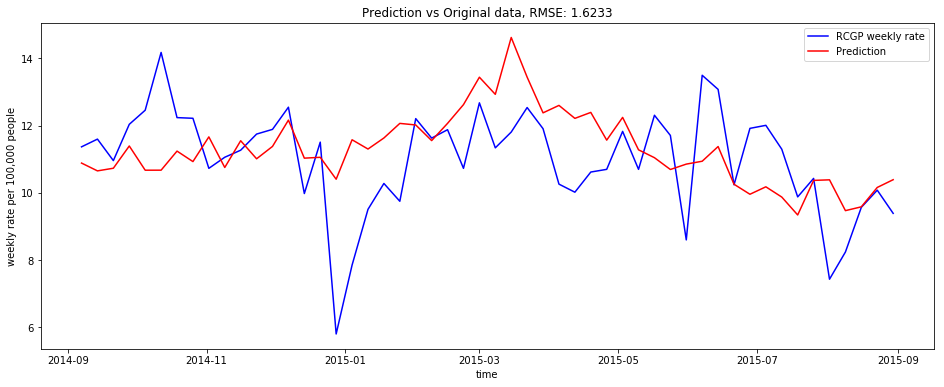

In [175]:
df6_gs = pd.DataFrame(predict_y_6, index=y_test_6.index, columns=['Prediction'])
plt.plot(y_test_6, color='blue',label='RCGP weekly rate')
plt.plot(df6_gs, color = 'red', label = 'Prediction')
plt.legend()
plt.xlabel('time')
plt.ylabel('weekly rate per 100,000 people')

rmse_6_gs = np.sqrt(np.mean((y_test_6.values - df6_gs.values)**2))
plt.title('Prediction vs Original data, RMSE: %.4f'% rmse_6_gs)

In [176]:
#metrics(y_test_6,df6_gs)
m6_1 = pd.DataFrame(metrics(y_test_6,df6_gs).values, index=['Elastic net'],columns =['r','MSE','RMSE','MAE','MAPE'])
m6_1

r       MSE      RMSE       MAE       MAPE
Elastic net  0.290187  2.635157  1.623317  1.256142  12.526718

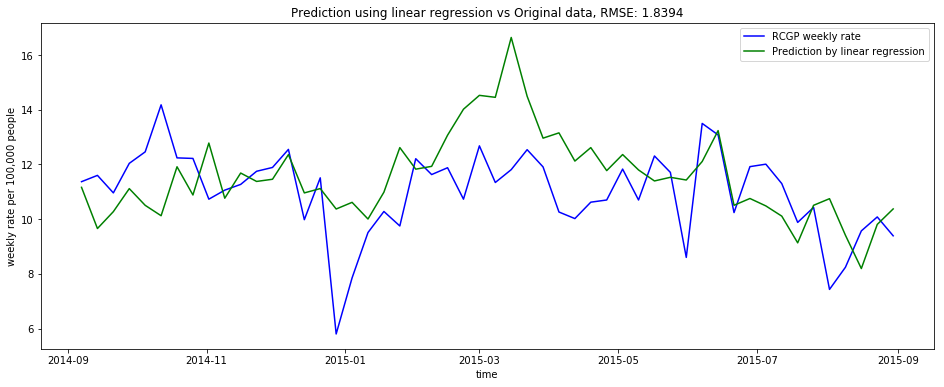

In [177]:
# linear regression (ordinary least square)

linear_6 = LinearRegression(fit_intercept= True)
linear_6.fit(X = x_train_6, y = y_train_6)
linear_train_6 = linear_6.predict(x_test_6)

l6 = pd.DataFrame(linear_train_6, index=y_test_6.index, columns=['Prediction'])

plt.plot(y_test_6, color='blue',label='RCGP weekly rate')
plt.plot(l6, color = 'green', label = 'Prediction by linear regression')
plt.legend()
plt.xlabel('time')
plt.ylabel('weekly rate per 100,000 people')

rmse_6= np.sqrt(np.mean((y_test_6.values - l6.values)**2))
plt.title('Prediction using linear regression vs Original data, RMSE: %.4f'% rmse_6)

In [178]:
m6_2 = pd.DataFrame(metrics(y_test_6,l6).values, index=['Linear regression'],columns =['r','MSE','RMSE','MAE','MAPE'])
m6_2

r       MSE      RMSE       MAE       MAPE
Linear regression  0.348851  3.383509  1.839432  1.407538  13.907257

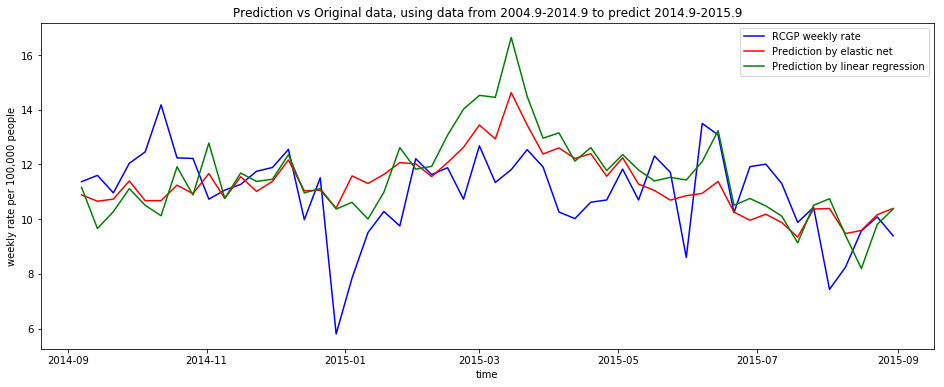

In [179]:
plt.plot(y_test_6, color='blue',label='RCGP weekly rate')
plt.plot(df6_gs, color = 'red', label = 'Prediction by elastic net')
plt.plot(l6, color = 'green', label = 'Prediction by linear regression')

plt.legend()
plt.xlabel('time')
plt.ylabel('weekly rate per 100,000 people')

plt.title('Prediction vs Original data, using data from 2004.9-2014.9 to predict 2014.9-2015.9')

In [180]:
p6 =pd.concat([m6_2,m6_1])
p6.iloc[:,:5]

r       MSE      RMSE       MAE       MAPE
Linear regression  0.348851  3.383509  1.839432  1.407538  13.907257
Elastic net        0.290187  2.635157  1.623317  1.256142  12.526718

In [181]:
# new training data 6

In [182]:
# 2009.9.1-2014.9.1 (5 years) -> 2014.9.1-2015.9.1 (1 year)
train_line_6 = pd.date_range(start= '2009-09-01', end='2014-09-01')
test_line_6 = pd.date_range(start='2014-09-01',end = '2015-09-01')
x_train_6 = gt_data.loc[train_line_6,:].dropna(0)
y_train_6 = rcgp_data.loc[train_line_6,:].dropna(0)
x_test_6 = gt_data.loc[test_line_6,:].dropna(0)
y_test_6 = rcgp_data.loc[test_line_6,:].dropna(0)

#plot the model on training data
parameters = {'alpha':[0.5],'l1_ratio':[0.5]}
# parameters = {'alpha':range(1,200,1),
#               'l1_ratio':[0.3,0.4,0.5,0.6,0.7]}

clf_6_n = GridSearchCV(ElasticNet(fit_intercept= True,max_iter=10000,tol=0.000005),param_grid=parameters,
                     scoring=make_scorer(r2_score))
clf_6_n.fit(X = x_train_6, y = y_train_6)
pre_6 =clf_6_n.best_estimator_.predict(x_test_6)
clf_6_n.best_params_


{'alpha': 0.5, 'l1_ratio': 0.5}

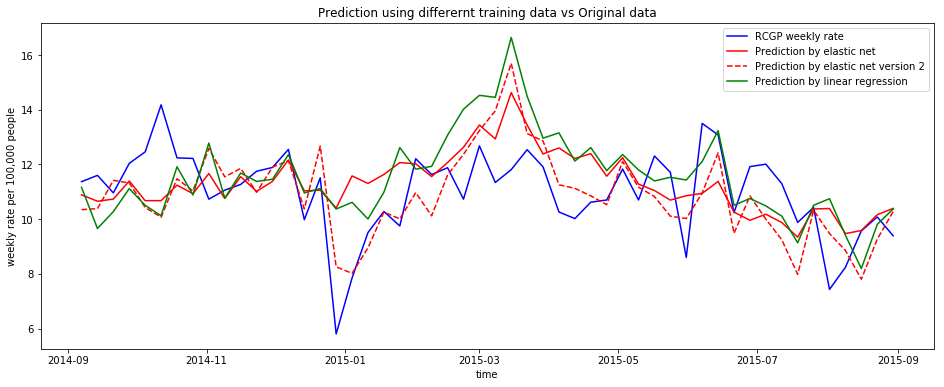

In [183]:
pre6 = pd.DataFrame(pre_6, index=y_test_6.index, columns=['Prediction'])

plt.plot(y_test_6, color='blue',label='RCGP weekly rate')
plt.plot(df6_gs, color = 'red', label = 'Prediction by elastic net')
plt.plot(pre6, 'r--', label = 'Prediction by elastic net version 2')
plt.plot(l6, color = 'green', label = 'Prediction by linear regression')


plt.legend()
plt.xlabel('time')
plt.ylabel('weekly rate per 100,000 people')

rmse_6= np.sqrt(np.mean((y_test_6.values - pre6.values)**2))
plt.title('Prediction using differernt training data vs Original data')

In [184]:
#m6_3 = metrics(y_test_6, pre6)
m6_3 = pd.DataFrame(metrics(y_test_6,pre6).values, index=['Elastic net version2'],columns =['r','MSE','RMSE','MAE','MAPE'])
m6_3

r       MSE      RMSE       MAE       MAPE
Elastic net version2  0.56268  2.079629  1.442092  1.132423  10.548543

In [185]:
pp6 = pd.concat([p6,m6_3])
pp6

r       MSE      RMSE       MAE       MAPE
Linear regression     0.348851  3.383509  1.839432  1.407538  13.907257
Elastic net           0.290187  2.635157  1.623317  1.256142  12.526718
Elastic net version2  0.562680  2.079629  1.442092  1.132423  10.548543

In [186]:
pp6.iloc[:,0:5]

r       MSE      RMSE       MAE       MAPE
Linear regression     0.348851  3.383509  1.839432  1.407538  13.907257
Elastic net           0.290187  2.635157  1.623317  1.256142  12.526718
Elastic net version2  0.562680  2.079629  1.442092  1.132423  10.548543

In [187]:
# elastic net 7

In [188]:
# 2004.9.1-2015.9.1 (11 years) -> 2015.9.1-2016.7.31
train_line_7 = pd.date_range(start= '2004-09-01', end='2015-09-01')
test_line_7 = pd.date_range(start='2015-09-01',end = '2016-07-31')
x_train_7 = gt_data.loc[train_line_7,:].dropna(0)
y_train_7 = rcgp_data.loc[train_line_7,:].dropna(0)
x_test_7 = gt_data.loc[test_line_7,:].dropna(0)
y_test_7 = rcgp_data.loc[test_line_7,:].dropna(0)


In [189]:
# 2004.9.1-2015.9.1 -> 2015.9.1-2016.7.31

# parameters = {'alpha':[0,10,20,30,40,50,60,70,80,90,100],'l1_ratio':[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
parameters = {'alpha':[3],'l1_ratio':[0.5]}
# parameters = {'alpha':range(1,200,1),
#               'l1_ratio':[0.3,0.4,0.5,0.6,0.7]}

mycv7 = TimeSeriesSplit(n_splits = 11)
#clf = GridSearchCV(ElasticNet(),param_grid=parameters, cv = mycv7)
clf_7 = GridSearchCV(ElasticNet(fit_intercept=True,max_iter=10000,tol=0.000001),param_grid=parameters,
                     scoring=make_scorer(r2_score))
clf_7.fit(X = x_train_7, y = y_train_7)
predict_y_7 = clf_7.best_estimator_.predict(x_test_7)
predict_y_7

array([ 10.65635591,  10.78173599,  10.84307746,  11.1317541 ,
        10.43429775,  11.11119669,  10.66532684,  11.01423458,
        11.91319744,  11.24677915,  11.40276806,  11.41862643,
        10.98067686,  11.17569706,  10.67710126,  10.69417245,
        10.51002409,  10.66250714,  11.73298883,  11.28279526,
        10.47309613,  11.06745075,  11.01993642,  11.7940142 ,
        12.09138348,  12.821799  ,  12.23744633,  12.94681338,
        13.26780508,  12.30773304,  12.3309077 ,  12.11837351,
        11.93503114,  11.86442639,  10.98397576,  10.26093872,
        11.0931214 ,  10.6022461 ,  10.28404772,  10.58091917,
        10.87770615,  10.58852866,  10.24514456,  10.15202157,
        10.3051158 ,  11.14028941,  10.97090655,  10.34669984])

In [190]:
clf_7.best_params_

{'alpha': 3, 'l1_ratio': 0.5}

In [191]:
weight_7 = clf_7.best_estimator_.coef_
pd.DataFrame(weight_7.reshape(1,62), columns= x_train_7.columns)

Abdominal cramps: (England)  Abdominal pain: (England)  \
0                         -0.0                  -0.036109   

   aching limbs: (England)  Adenovirus: (England)  anti nausea: (England)  \
0                      0.0                   -0.0               -0.008051   

   Antibiotics: (England)  autumn: (England)  barbecue: (England)  \
0                     0.0               -0.0            -0.014304   

   bellyache: (England)  bloody diarrhoea: (England)  Diarrhea: (England)  \
0                   0.0                     0.000256             0.031857   

   Diarrhoea: (England)  Diarrhoea and vomiting: (England)  \
0                   0.0                           0.008305   

   Dulcolax: (England)  E coli: (England)  emesis: (England)  \
0            -0.018685           0.007211                0.0   

   feel sick: (England)  fever: (England)  Food poisoning: (England)  \
0             -0.017563               0.0                        0.0   

   Gastritis: (England)  Gastro intestinal: (England)  \
0                  -0.0                          -0.0   

   Gastroenteritis: (England)  gastroenteritis contagious: (England)  \
0                    0.022668                                    0.0   

   gastroenteritis NHS: (England)  Gastroenteritis symptoms: (England)  \
0                             0.0                                 -0.0   

   Gastrointestinal: (England)  GI: (England)  Hand Hygiene: (England)  \
0                     0.003039           -0.0                     -0.0   

   headache: (England)  infants: (England)  microorganisms: (England)  \
0                  0.0                 0.0                   0.000425   

   Nausea: (England)  NHS gastroenteritis: (England)  Norovirus: (England)  \
0               -0.0                             0.0              0.002352   

   Norwalk: (England)  Norwalk virus: (England)  Ondansetron: (England)  \
0                -0.0                       0.0                    -0.0   

   Oral rehydration therapy: (England)  painful stomach cramps: (England)  \
0                               0.0044                                0.0   

   Parasites: (England)  raw food: (England)  raw meat: (England)  \
0                  -0.0            -0.008759                 -0.0   

   rota virus: (England)  Rotavirus vaccine: (England)  Rotavirus: (England)  \
0               0.008534                     -0.004178               0.03168   

   Salmonella: (England)  SASP: (England)  seafood: (England)  \
0                   -0.0              0.0                -0.0   

   spring: (England)  stomach ache: (England)  stomach flu: (England)  \
0           0.046728                     -0.0                     0.0   

   stomachache: (England)  summer: (England)  \
0                     0.0                0.0   

   Symptoms of gastroenteritis: (England)  throw up: (England)  \
0                                0.000534                 -0.0   

   viral gastroenteritis: (England)  vomit: (England)  vomiting: (England)  \
0                         -0.003357          0.003553             0.000947   

   winter: (England)  Winter vomiting: (England)  \
0                0.0                    0.005983   

   Winter vomiting bug: (England)  Zofran: (England)  
0                             0.0          -0.002084

In [192]:
np.sum(weight_7!=0)

25

In [193]:
w7 = pd.Series(weight_7, index = x_train_7.columns)
w7.sort_values()


Abdominal pain: (England)                -0.036109
Dulcolax: (England)                      -0.018685
feel sick: (England)                     -0.017563
barbecue: (England)                      -0.014304
raw food: (England)                      -0.008759
anti nausea: (England)                   -0.008051
Rotavirus vaccine: (England)             -0.004178
viral gastroenteritis: (England)         -0.003357
Zofran: (England)                        -0.002084
stomach flu: (England)                    0.000000
Nausea: (England)                        -0.000000
NHS gastroenteritis: (England)            0.000000
Norwalk: (England)                       -0.000000
Norwalk virus: (England)                  0.000000
Ondansetron: (England)                   -0.000000
painful stomach cramps: (England)         0.000000
Parasites: (England)                     -0.000000
stomachache: (England)                    0.000000
winter: (England)                         0.000000
throw up: (England)            

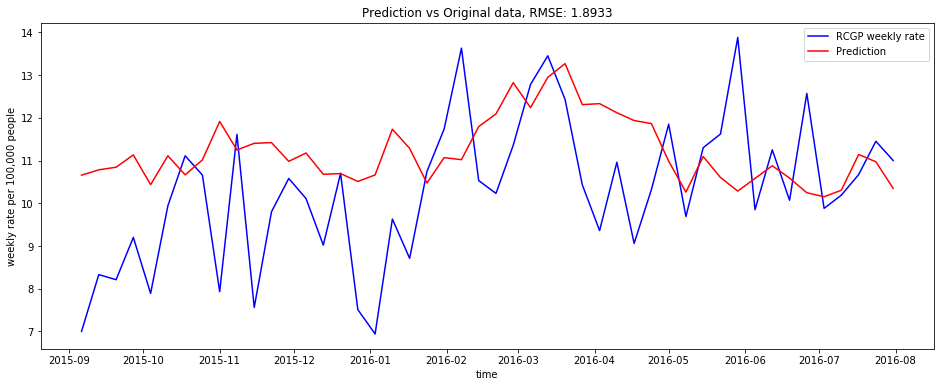

In [194]:
df7_gs = pd.DataFrame(predict_y_7, index=y_test_7.index, columns=['Prediction'])
plt.plot(y_test_7, color='blue',label='RCGP weekly rate')
plt.plot(df7_gs, color = 'red', label = 'Prediction')
plt.legend()
plt.xlabel('time')
plt.ylabel('weekly rate per 100,000 people')

rmse_7_gs = np.sqrt(np.mean((y_test_7.values - df7_gs.values)**2))
plt.title('Prediction vs Original data, RMSE: %.4f'% rmse_7_gs)

In [195]:
#metrics(y_test_7,df7_gs)
m7_1 = pd.DataFrame(metrics(y_test_7,df7_gs).values, index=['Elastic net'],columns =['r','MSE','RMSE','MAE','MAPE'])
m7_1

r       MSE      RMSE       MAE       MAPE
Elastic net  0.196825  3.584703  1.893331  1.503405  16.232602

In [196]:
#linear 7

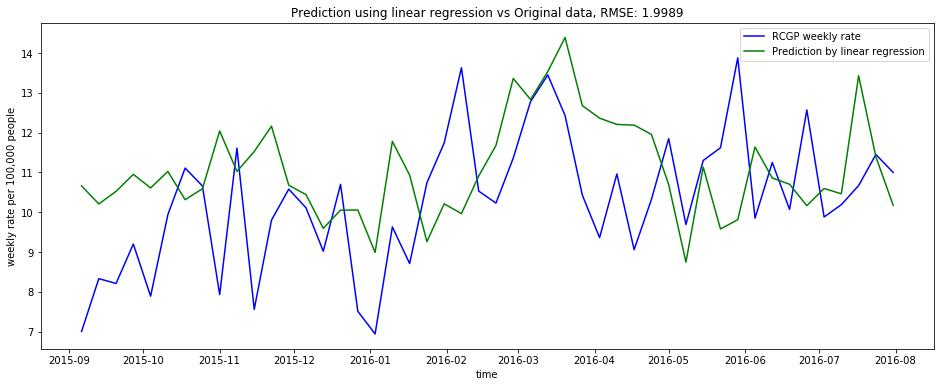

In [197]:
# linear regression (ordinary least square)

linear_7 = LinearRegression(fit_intercept= True)
linear_7.fit(X = x_train_7, y = y_train_7)
linear_train_7 = linear_7.predict(x_test_7)

l7 = pd.DataFrame(linear_train_7, index=y_test_7.index, columns=['Prediction'])

plt.plot(y_test_7, color='blue',label='RCGP weekly rate')
plt.plot(l7, color = 'green', label = 'Prediction by linear regression')
plt.legend()
plt.xlabel('time')
plt.ylabel('weekly rate per 100,000 people')

rmse_7= np.sqrt(np.mean((y_test_7.values - l7.values)**2))
plt.title('Prediction using linear regression vs Original data, RMSE: %.4f'% rmse_7)

In [199]:
m7_2 = pd.DataFrame(metrics(y_test_7,l7).values, index=['Linear regression'],columns =['r','MSE','RMSE','MAE','MAPE'])
m7_2

r       MSE      RMSE      MAE       MAPE
Linear regression  0.194119  3.995605  1.998901  1.62525  17.013356

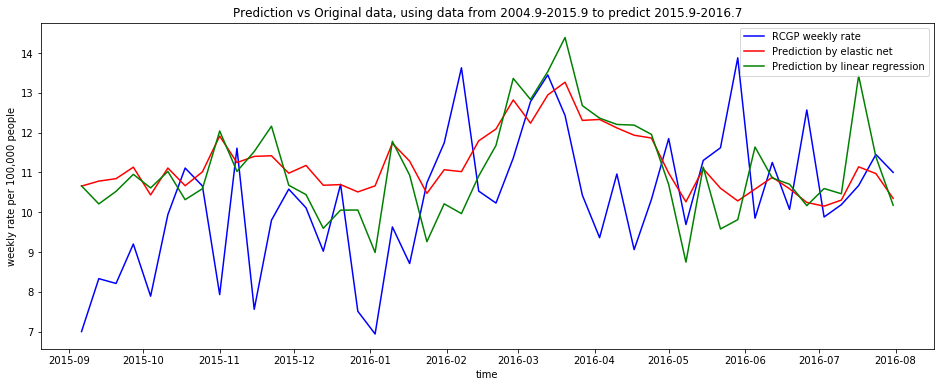

In [200]:
plt.plot(y_test_7, color='blue',label='RCGP weekly rate')
plt.plot(df7_gs, color = 'red', label = 'Prediction by elastic net')
plt.plot(l7, color = 'green', label = 'Prediction by linear regression')

plt.legend()
plt.xlabel('time')
plt.ylabel('weekly rate per 100,000 people')

plt.title('Prediction vs Original data, using data from 2004.9-2015.9 to predict 2015.9-2016.7')

In [201]:
p7=pd.concat([m7_2,m7_1])
p7.iloc[:,:5]

r       MSE      RMSE       MAE       MAPE
Linear regression  0.194119  3.995605  1.998901  1.625250  17.013356
Elastic net        0.196825  3.584703  1.893331  1.503405  16.232602

In [205]:
# new training data 7

In [206]:
# 2010.9.1-2015.9.1 (5 years) -> 2015.9.1-2016.7.31 
train_line_7 = pd.date_range(start= '2010-09-01', end='2015-09-01')
test_line_7 = pd.date_range(start='2015-09-01',end = '2016-07-31')
x_train_7 = gt_data.loc[train_line_7,:].dropna(0)
y_train_7 = rcgp_data.loc[train_line_7,:].dropna(0)
x_test_7 = gt_data.loc[test_line_7,:].dropna(0)
y_test_7 = rcgp_data.loc[test_line_7,:].dropna(0)

#plot the model on training data
parameters = {'alpha':[1],'l1_ratio':[0.5]}
# parameters = {'alpha':range(1,200,1),
#               'l1_ratio':[0.3,0.4,0.5,0.6,0.7]}

clf_7_n = GridSearchCV(ElasticNet(fit_intercept= True,max_iter=10000,tol=0.000005),param_grid=parameters,
                     scoring=make_scorer(r2_score))
clf_7_n.fit(X = x_train_7, y = y_train_7)
pre_7 =clf_7_n.best_estimator_.predict(x_test_7)
clf_7_n.best_params_


{'alpha': 1, 'l1_ratio': 0.5}

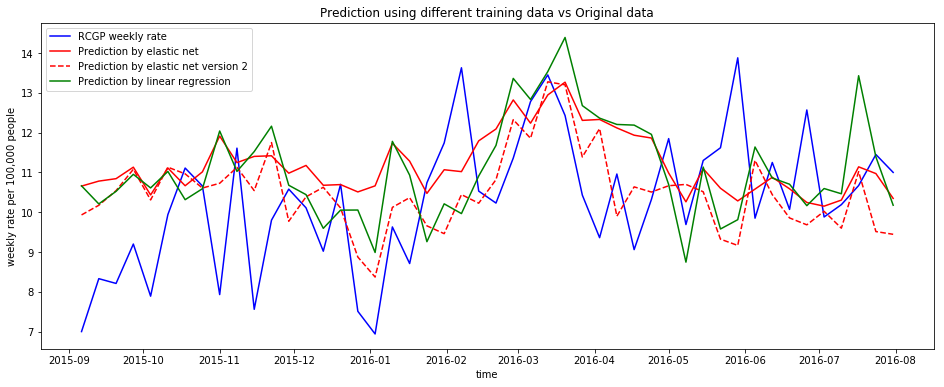

In [207]:
pre7 = pd.DataFrame(pre_7, index=y_test_7.index, columns=['Prediction'])

plt.plot(y_test_7, color='blue',label='RCGP weekly rate')
plt.plot(df7_gs, color = 'red', label = 'Prediction by elastic net')
plt.plot(pre7, 'r--', label = 'Prediction by elastic net version 2')
plt.plot(l7, color = 'green', label = 'Prediction by linear regression')

plt.legend()
plt.xlabel('time')
plt.ylabel('weekly rate per 100,000 people')

rmse_7= np.sqrt(np.mean((y_test_7.values - pre7.values)**2))
plt.title('Prediction using different training data vs Original data')

In [209]:
# m7_3=metrics(y_test_7,pre7)
# m7_3
m7_3 = pd.DataFrame(metrics(y_test_7,pre7).values, index=['Elastic net version 2'],columns =['r','MSE','RMSE','MAE','MAPE'])
m7_3

r       MSE      RMSE       MAE       MAPE
Elastic net version 2  0.253896  2.903862  1.704072  1.374272  14.052882

In [210]:
pp7 = pd.concat([p7,m7_3])
pp7

r       MSE      RMSE       MAE       MAPE
Linear regression      0.194119  3.995605  1.998901  1.625250  17.013356
Elastic net            0.196825  3.584703  1.893331  1.503405  16.232602
Elastic net version 2  0.253896  2.903862  1.704072  1.374272  14.052882

In [211]:
pp7.iloc[:,0:5]

r       MSE      RMSE       MAE       MAPE
Linear regression      0.194119  3.995605  1.998901  1.625250  17.013356
Elastic net            0.196825  3.584703  1.893331  1.503405  16.232602
Elastic net version 2  0.253896  2.903862  1.704072  1.374272  14.052882

# total

In [212]:
arima_result_1 = pd.DataFrame(predictions_2009,index=y_test_1.index, columns=['ARIMA_Prediction'])
arima_result_2 = pd.DataFrame(predictions_2010,index=y_test_2.index, columns=['ARIMA_Prediction'])
arima_result_3 = pd.DataFrame(predictions_2011,index=y_test_3.index, columns=['ARIMA_Prediction'])
arima_result_4 = pd.DataFrame(predictions_2012,index=y_test_4.index, columns=['ARIMA_Prediction'])
arima_result_5 = pd.DataFrame(predictions_2013,index=y_test_5.index, columns=['ARIMA_Prediction'])
arima_result_6 = pd.DataFrame(predictions_2014,index=y_test_6.index, columns=['ARIMA_Prediction'])
arima_result_7 = pd.DataFrame(predictions_2015,index=y_test_7.index, columns=['ARIMA_Prediction'])

In [213]:
arima_result = arima_result_1.append(arima_result_2)
arima_result = arima_result.append(arima_result_3)
arima_result = arima_result.append(arima_result_4)
arima_result = arima_result.append(arima_result_5)
arima_result = arima_result.append(arima_result_6)
arima_result = arima_result.append(arima_result_7)
arima_result.shape

(361, 1)

In [214]:
#ARIMA METRICS TABLE
arima_m1 = metrics(arima_result_1,y_test_1)
arima_M1 = pd.DataFrame(metrics(arima_result_1,y_test_1).values, index=['ARIMA model'],columns =['r','MSE','RMSE','MAE','MAPE'])

arima_m2 = metrics(arima_result_2,y_test_2)
arima_M2 = pd.DataFrame(metrics(arima_result_2,y_test_2).values, index=['ARIMA model'],columns =['r','MSE','RMSE','MAE','MAPE'])

arima_m3 = metrics(arima_result_3,y_test_3)
arima_M3 = pd.DataFrame(metrics(arima_result_3,y_test_3).values, index=['ARIMA model'],columns =['r','MSE','RMSE','MAE','MAPE'])

arima_m4 = metrics(arima_result_4,y_test_4)
arima_M4 = pd.DataFrame(metrics(arima_result_4,y_test_4).values, index=['ARIMA model'],columns =['r','MSE','RMSE','MAE','MAPE'])

arima_m5 = metrics(arima_result_5,y_test_5)
arima_M5 = pd.DataFrame(metrics(arima_result_5,y_test_5).values, index=['ARIMA model'],columns =['r','MSE','RMSE','MAE','MAPE'])

arima_m6 = metrics(arima_result_6,y_test_6)
arima_M6 = pd.DataFrame(metrics(arima_result_6,y_test_6).values, index=['ARIMA model'],columns =['r','MSE','RMSE','MAE','MAPE'])

arima_m7 = metrics(arima_result_7,y_test_7)
arima_M7 = pd.DataFrame(metrics(arima_result_7,y_test_7).values, index=['ARIMA model'],columns =['r','MSE','RMSE','MAE','MAPE'])


In [217]:
lr = l1.append(l2)
lr = lr.append(l3)
lr = lr.append(l4)
lr = lr.append(l5)
lr = lr.append(l6)
lr = lr.append(l7)
lr.shape

(361, 1)

In [218]:
df = df1_gs.append(df2_gs_n)
df = df.append(df3_gs)
df = df.append(df4_gs)
df = df.append(df5_gs)
df = df.append(df6_gs)
df = df.append(df7_gs)
df.shape

(361, 1)

In [219]:
df_n = df1_gs.append(pre2)
df_n = df_n.append(pre3)
df_n = df_n.append(df4_gs)
df_n = df_n.append(pre5)
df_n = df_n.append(pre6)
df_n = df_n.append(pre7)
df_n.shape

(361, 1)

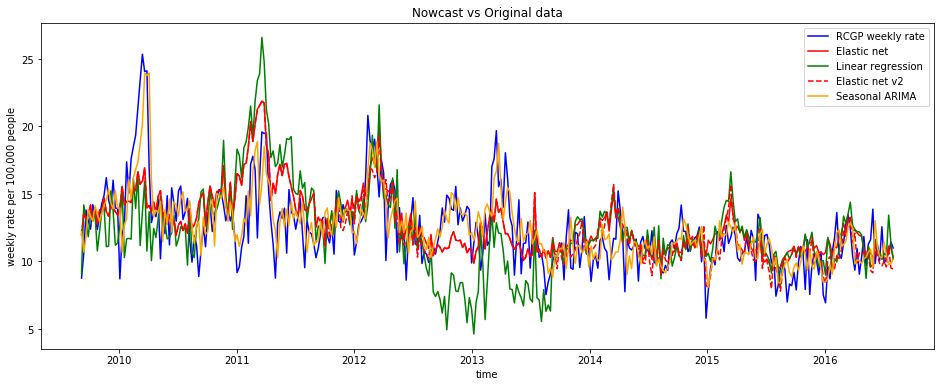

In [220]:
compare = df.join(rcgp_2010_2016)


plt.plot(rcgp_2010_2016, color='blue',label='RCGP weekly rate')
plt.plot(df, color = 'red', label = 'Elastic net')
plt.plot(lr, color = 'green', label = 'Linear regression')
plt.plot(df_n,'r--',label = 'Elastic net v2')
plt.plot(arima_result,color = 'orange', label = 'Seasonal ARIMA' )
plt.legend()
plt.xlabel('time')
plt.ylabel('weekly rate per 100,000 people')

#rmse_all_gs = np.sqrt(np.mean((compare['weekly_rate'] - compare['Prediction'])**2))
plt.title('Nowcast vs Original data')

# Combination model (ARMAX)

In [221]:
#y_test_1 2009-09-06 ---  2010-08-29
#y_test_2 2010-09-05 ---  2011-08-28
#y_test_3 2011-09-04 ---  2012-08-26
#y_test_4 2012-09-02 ---  2013-08-25
#y_test_5 2013-09-01 ---  2014-08-31
#y_test_6 2014-09-07 ---  2015-08-30
#y_test_7 2015-09-06 ---  2016-07-31


In [222]:
#combine 1
#2009.9-2010.9 -- 2010.9-2011.9
test_line_1 = pd.date_range(start='2009-09-01',end = '2010-09-01')
y_test_1 = rcgp_data.loc[test_line_1,:].dropna(0)

p = d = q = range(0, 4)
# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))
# Generate all different combinations of seasonal p, q and q triplets
# seasonal_pdq = [(x[0], x[1], x[2], 2) for x in list(itertools.product(p, d, q))]
# seasonal_pdq

In [223]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

min_AIC = 10000000

for param in pdq:
    # for param_seasonal in seasonal_pdq:
        try:       
            mod = sm.tsa.statespace.SARIMAX(
                                    endog = y_test_1,
                                    exog =df1_gs,
                                    order=param
                                    #seasonal_order=param_seasonal
                              )

            results = mod.fit()    
            AIC = results.aic
            
            if AIC< min_AIC:
                bestmodel=mod
                min_AIC=AIC
                #print('Better ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, min_AIC))
                print('Better ARIMA{} - AIC:{}'.format(param, min_AIC))
            else:
                pass
            
        except:
            continue

Better ARIMA(0, 0, 1) - AIC:256.7780412700569
Better ARIMA(0, 1, 1) - AIC:239.07236579432185
Better ARIMA(1, 1, 0) - AIC:238.59817888694016


In [224]:
# 2009.9-2010.9 ---> 2010.9-2011.9
# Fit the model

mod = sm.tsa.statespace.SARIMAX(endog = y_test_2,exog = pre2, order=(1,1,0),seasonal_order=(1,0,1,1))
fit_res = mod.fit(disp=0)
print(fit_res.summary())


                                 Statespace Model Results                                
Dep. Variable:                       weekly_rate   No. Observations:                   52
Model:             SARIMAX(1, 1, 0)x(1, 0, 1, 1)   Log Likelihood                -107.730
Date:                           Thu, 07 Sep 2017   AIC                            225.459
Time:                                   02:21:24   BIC                            235.216
Sample:                               09-05-2010   HQIC                           229.200
                                    - 08-28-2011                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Prediction     0.5472      0.151      3.620      0.000       0.251       0.843
ar.L1          0.2097    122.644      0.002

In [225]:
res = mod.filter(fit_res.params)

c_pre_1 = res.predict()
c_pre_1
#predict_ci = predict.conf_int()
#predict_ci
c_pre_1 = np.asarray(c_pre_1).reshape([52,1])
combine_2 =  pd.DataFrame(c_pre_1, index =y_test_2.index, columns=['combine_result'])

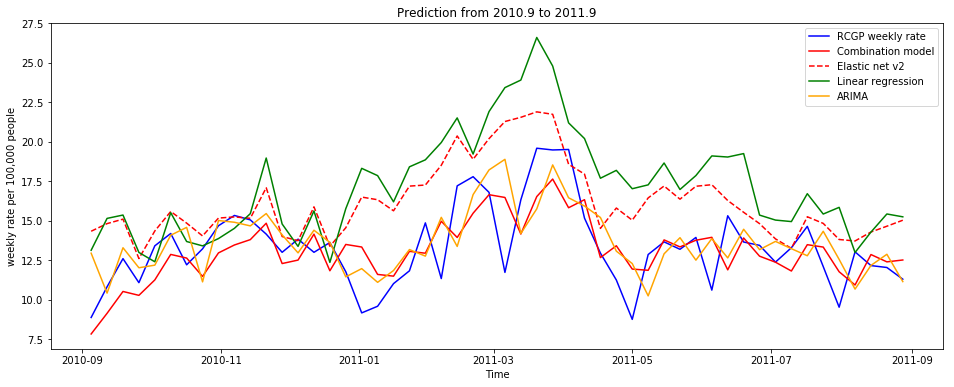

In [226]:
plt.plot(y_test_2[0:], color='blue',label='RCGP weekly rate')
plt.plot(combine_2[0:], color = 'red', label = 'Combination model')
plt.plot(pre2[0:],'r--',label = 'Elastic net v2')
plt.plot(l2[0:], color = 'green', label = 'Linear regression')
plt.plot(arima_result_2[0:],color='orange',label='ARIMA')

plt.legend()
plt.xlabel('Time')
plt.ylabel('weekly rate per 100,000 people')
plt.title('Prediction from 2010.9 to 2011.9')

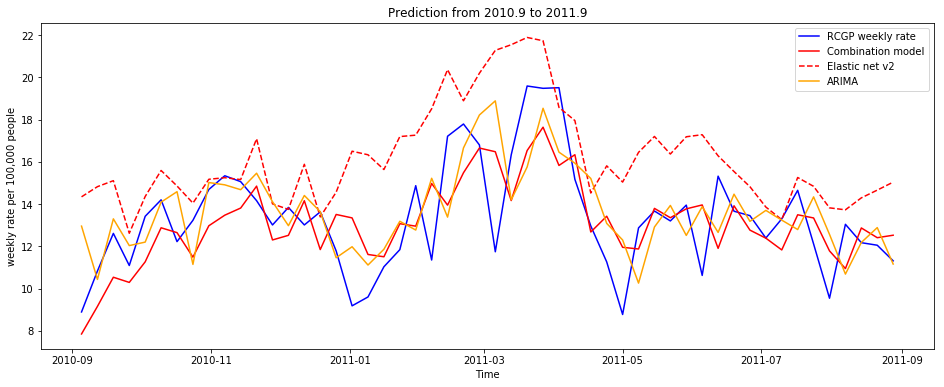

In [260]:
plt.plot(y_test_2[0:], color='blue',label='RCGP weekly rate')
plt.plot(combine_2[0:], color = 'red', label = 'Combination model')
plt.plot(pre2[0:],'r--',label = 'Elastic net v2')
# plt.plot(l2[0:], color = 'green', label = 'Linear regression')
plt.plot(arima_result_2[0:],color='orange',label='ARIMA')

plt.legend()
plt.xlabel('Time')
plt.ylabel('weekly rate per 100,000 people')
plt.title('Prediction from 2010.9 to 2011.9')

In [228]:
M2 = pd.DataFrame(metrics(y_test_2,combine_2).values, index=['Combination model'],columns =['r','MSE','RMSE','MAE','MAPE'])

In [229]:
mm2 = pd.concat([pp2,M2])
mm2.iloc[:,:5]

r        MSE      RMSE       MAE       MAPE
Linear regression      0.520068  22.922215  4.787715  3.984251  32.505831
Elastic net            0.530860  13.518151  3.676704  2.979412  25.313326
Elastic net version 2  0.577823  12.868288  3.587240  2.867627  24.162673
Combination model      0.635556   3.908093  1.976890  1.624950  12.751238

In [230]:
mmm2 = pd.concat([mm2,arima_M2])
mmm2

r        MSE      RMSE       MAE       MAPE
Linear regression      0.520068  22.922215  4.787715  3.984251  32.505831
Elastic net            0.530860  13.518151  3.676704  2.979412  25.313326
Elastic net version 2  0.577823  12.868288  3.587240  2.867627  24.162673
Combination model      0.635556   3.908093  1.976890  1.624950  12.751238
ARIMA model            0.569025   4.644832  2.155187  1.667201  12.187116

In [231]:
#Combine 2
#2010.9-2011.9 -- 2011.9-2012.9
test_line_2 = pd.date_range(start='2010-09-01',end = '2011-09-01')
y_test_2 = rcgp_data.loc[test_line_2,:].dropna(0)

p = d = q = range(0, 4)
# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))
# Generate all different combinations of seasonal p, q and q triplets
# seasonal_pdq = [(x[0], x[1], x[2], 2) for x in list(itertools.product(p, d, q))]
# seasonal_pdq

In [232]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

min_AIC = 10000000

for param in pdq:
    # for param_seasonal in seasonal_pdq:
        try:       
            mod = sm.tsa.statespace.SARIMAX(
                                    endog = y_test_2,
                                    exog = pre2,
                                    order=param
                                    #seasonal_order=param_seasonal
                              )

            results = mod.fit()    
            AIC = results.aic
            
            if AIC< min_AIC:
                bestmodel=mod
                min_AIC=AIC
                #print('Better ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, min_AIC))
                print('Better ARIMA{} - AIC:{}'.format(param, min_AIC))
            else:
                pass
            
        except:
            continue



Better ARIMA(0, 0, 1) - AIC:224.51944239753905
Better ARIMA(0, 1, 2) - AIC:224.13341746438618
Better ARIMA(1, 1, 1) - AIC:223.60753291486776


In [233]:
pre_3

array([ 12.61356838,  13.27510955,  13.18383903,  12.8759481 ,
        11.1683755 ,  13.02133199,  11.79166965,  12.72749289,
        12.87844384,  13.95395668,  14.73667978,  12.50735942,
        12.29341118,  12.77915316,  13.70100575,  12.96642191,
        14.86033916,  12.78367892,  14.81492275,  13.75763655,
        14.49760767,  15.31059512,  13.61084562,  15.31950509,
        16.91878524,  16.76570365,  16.20699435,  16.60761088,
        19.19389494,  16.59075527,  15.24329856,  16.06824637,
        14.27218961,  14.74402907,  15.81706282,  12.91785778,
        13.73899283,  11.24613305,  13.13636869,  11.2072509 ,
        11.51343484,  11.57297302,  12.88246221,  11.21524286,
        12.49776298,  10.32253156,  11.7973093 ,  11.18748349,
        10.85317392,  10.58725015,  10.19755262,  11.82121749])

In [234]:

# Fit the model

mod = sm.tsa.statespace.SARIMAX(endog = y_test_3,exog = pre3, order=(0,0,1),seasonal_order=(1,0,1,5))
fit_res = mod.fit(disp=1)
print(fit_res.summary())


                                 Statespace Model Results                                
Dep. Variable:                       weekly_rate   No. Observations:                   52
Model:             SARIMAX(0, 0, 1)x(1, 0, 1, 5)   Log Likelihood                -107.542
Date:                           Thu, 07 Sep 2017   AIC                            225.084
Time:                                   02:22:02   BIC                            234.840
Sample:                               09-04-2011   HQIC                           228.824
                                    - 08-26-2012                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Prediction     0.9902      0.018     56.321      0.000       0.956       1.025
ma.L1         -0.0368      0.151     -0.244

In [235]:
res = mod.filter(fit_res.params)

c_pre_2 = res.predict()
c_pre_2
#predict_ci = predict.conf_int()
#predict_ci
c_pre_2 = np.asarray(c_pre_2).reshape([52,1])
combine_3 =  pd.DataFrame(c_pre_2, index =y_test_3.index, columns=['combine_result'])



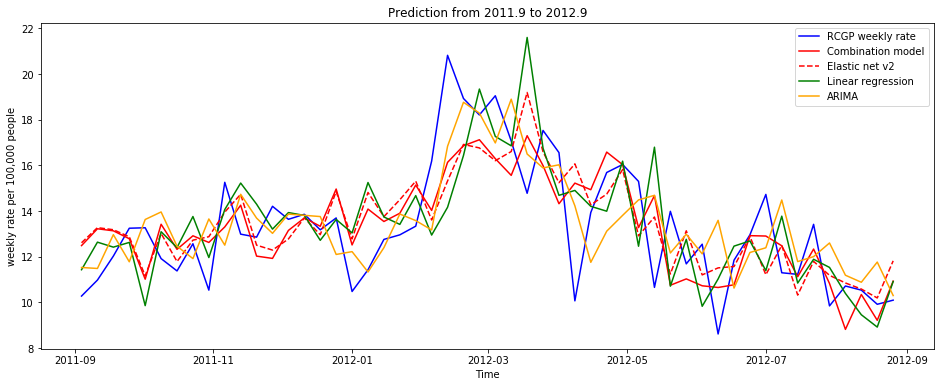

In [236]:
plt.plot(y_test_3[0:], color='blue',label='RCGP weekly rate')
plt.plot(combine_3[0:], color = 'red', label = 'Combination model')
plt.plot(pre3[0:],'r--',label = 'Elastic net v2')
plt.plot(l3[0:], color = 'green', label = 'Linear regression')
plt.plot(arima_result_3[0:],color='orange',label='ARIMA')

plt.legend()
plt.xlabel('Time')
plt.ylabel('weekly rate per 100,000 people')
plt.title('Prediction from 2011.9 to 2012.9')


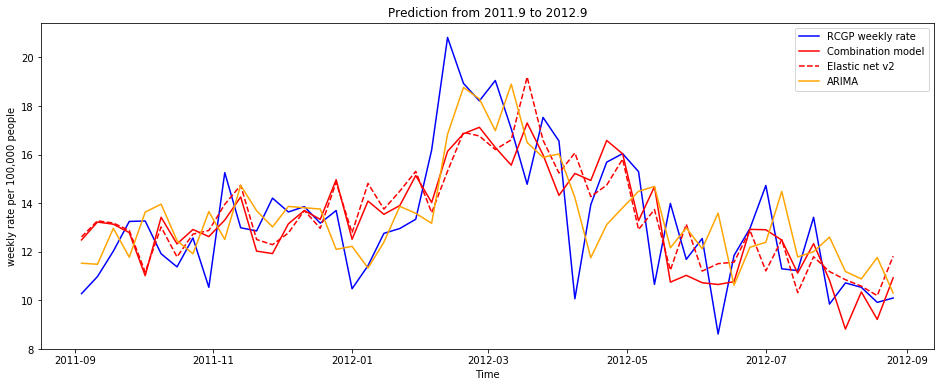

In [261]:
plt.plot(y_test_3[0:], color='blue',label='RCGP weekly rate')
plt.plot(combine_3[0:], color = 'red', label = 'Combination model')
plt.plot(pre3[0:],'r--',label = 'Elastic net v2')
#plt.plot(l3[0:], color = 'green', label = 'Linear regression')
plt.plot(arima_result_3[0:],color='orange',label='ARIMA')

plt.legend()
plt.xlabel('Time')
plt.ylabel('weekly rate per 100,000 people')
plt.title('Prediction from 2011.9 to 2012.9')


In [237]:
M3 = pd.DataFrame(metrics(y_test_3,combine_3).values, index=['Combination model'],columns =['r','MSE','RMSE','MAE','MAPE'])

mm3 = pd.concat([pp3,M3])
mm3.iloc[:,:5]

mmm3 = pd.concat([mm3,arima_M3])
mmm3

r       MSE      RMSE       MAE       MAPE
Linear regression      0.563306  5.679267  2.383121  1.766330  13.648798
Elastic net            0.660853  4.506053  2.122747  1.683123  13.598560
Elastic net version 2  0.631200  4.342123  2.083776  1.619010  12.585504
Combination model      0.700195  3.629534  1.905134  1.559559  12.080259
ARIMA model            0.697389  3.664814  1.914370  1.507279  11.181773

In [238]:
#Combine  3
#2011.9-2012.9 -- 2012.9-2013.9
test_line_3 = pd.date_range(start='2011-09-01',end = '2012-09-01')
y_test_3 = rcgp_data.loc[test_line_3,:].dropna(0)

p = d = q = range(0, 4)
# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))
# Generate all different combinations of seasonal p, q and q triplets
# seasonal_pdq = [(x[0], x[1], x[2], 2) for x in list(itertools.product(p, d, q))]
# seasonal_pdq


In [239]:
# Fit the model
mod = sm.tsa.statespace.SARIMAX(endog = y_test_4,exog = df4_gs, order=(0,0,4),seasonal_order=(1,0,1,7))
fit_res = mod.fit(disp=0)
#print(fit_res.summary())

In [240]:
res = mod.filter(fit_res.params)
c_pre_3 = res.predict()
c_pre_3
#predict_ci = predict.conf_int()
#predict_ci
c_pre_3 = np.asarray(c_pre_3).reshape([53,1])
combine_4 =  pd.DataFrame(c_pre_3, index =y_test_4.index, columns=['combine_result'])


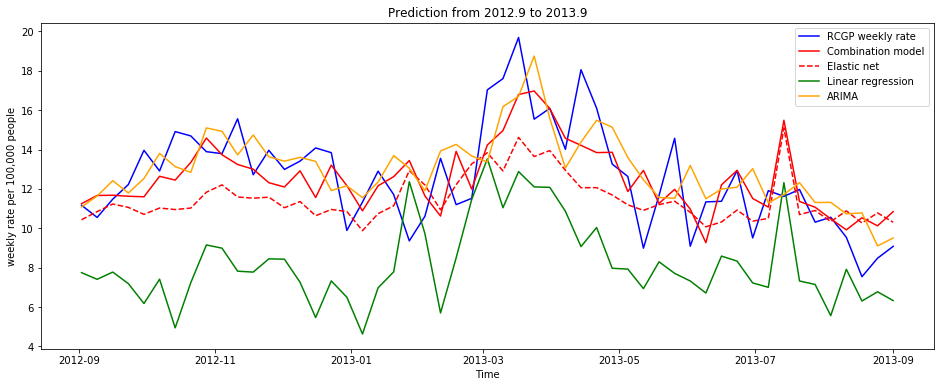

In [241]:
plt.plot(y_test_4[0:], color='blue',label='RCGP weekly rate')
plt.plot(combine_4[0:], color = 'red', label = 'Combination model')
plt.plot(df4_gs[0:],'r--',label = 'Elastic net')
plt.plot(l4[0:], color = 'green', label = 'Linear regression')
plt.plot(arima_result_4[0:],color='orange',label='ARIMA')

plt.legend()
plt.xlabel('Time')
plt.ylabel('weekly rate per 100,000 people')
plt.title('Prediction from 2012.9 to 2013.9')


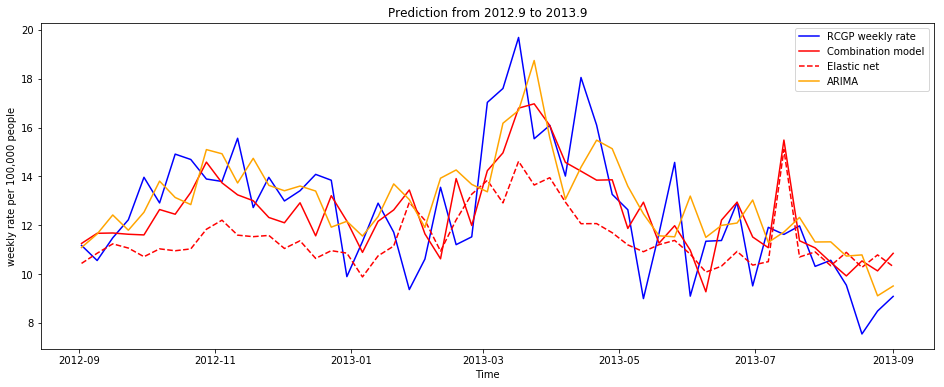

In [262]:
plt.plot(y_test_4[0:], color='blue',label='RCGP weekly rate')
plt.plot(combine_4[0:], color = 'red', label = 'Combination model')
plt.plot(df4_gs[0:],'r--',label = 'Elastic net')
#plt.plot(l4[0:], color = 'green', label = 'Linear regression')
plt.plot(arima_result_4[0:],color='orange',label='ARIMA')

plt.legend()
plt.xlabel('Time')
plt.ylabel('weekly rate per 100,000 people')
plt.title('Prediction from 2012.9 to 2013.9')


In [243]:
M4 = pd.DataFrame(metrics(y_test_4,combine_4).values, index=['Combination model'],columns =['r','MSE','RMSE','MAE','MAPE'])

mm4 = pd.concat([pp4,M4])
mm4.iloc[:,:5]

mmm4 = pd.concat([mm4,arima_M4])
mmm4

r        MSE      RMSE       MAE       MAPE
Linear regression  0.438601  25.499387  5.049692  4.539459  34.893337
Elastic net        0.527274   5.999247  2.449336  2.085853  16.097235
Elastic net v2     0.296449   9.710284  3.116133  2.538878  18.697522
Combination model  0.681511   3.492456  1.868811  1.472471  12.217901
ARIMA model        0.693764   3.501195  1.871148  1.468961  11.155675

In [244]:
#Combine  4
#2012.9-2013.9 -- 2013.9-2014.9
test_line_4 = pd.date_range(start='2012-09-01',end = '2013-09-01')
y_test_4 = rcgp_data.loc[test_line_4,:].dropna(0)

p = d = q = range(0, 4)
# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))
# Generate all different combinations of seasonal p, q and q triplets
# seasonal_pdq = [(x[0], x[1], x[2], 2) for x in list(itertools.product(p, d, q))]
# seasonal_pdq

In [245]:
# Fit the model
mod = sm.tsa.statespace.SARIMAX(endog = y_test_5,exog = pre5, order=(0,0,4),seasonal_order=(1,0,1,7))
fit_res = mod.fit(disp=0)
print(fit_res.summary())


                                 Statespace Model Results                                
Dep. Variable:                       weekly_rate   No. Observations:                   52
Model:             SARIMAX(0, 0, 4)x(1, 0, 1, 7)   Log Likelihood                 -94.607
Date:                           Thu, 07 Sep 2017   AIC                            205.214
Time:                                   02:22:55   BIC                            220.824
Sample:                               09-08-2013   HQIC                           211.199
                                    - 08-31-2014                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Prediction     0.9223      0.034     26.798      0.000       0.855       0.990
ma.L1          0.2479      0.139      1.783

In [246]:
res = mod.filter(fit_res.params)
c_pre_4 = res.predict()
c_pre_4
#predict_ci = predict.conf_int()
#predict_ci
c_pre_4 = np.asarray(c_pre_4).reshape([52,1])
combine_5 =  pd.DataFrame(c_pre_4, index =y_test_5.index, columns=['combine_result'])


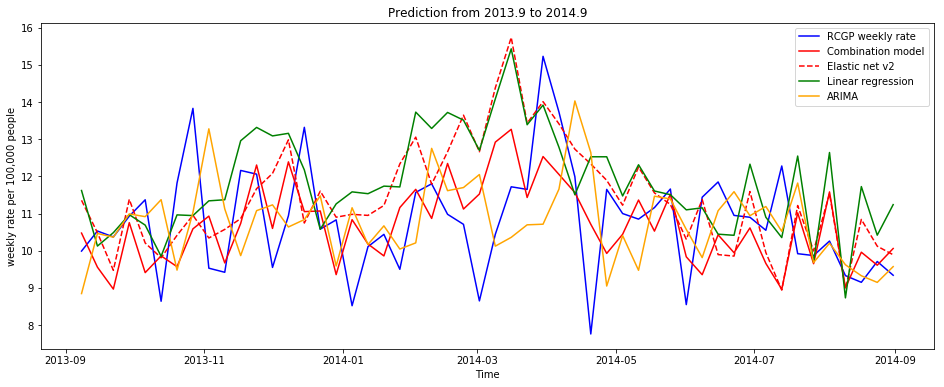

In [247]:
plt.plot(y_test_5[0:], color='blue',label='RCGP weekly rate')
plt.plot(combine_5[0:], color = 'red', label = 'Combination model')
plt.plot(pre5[0:],'r--',label = 'Elastic net v2')
plt.plot(l5[0:], color = 'green', label = 'Linear regression')
plt.plot(arima_result_5[0:],color='orange',label='ARIMA')

plt.legend()
plt.xlabel('Time')
plt.ylabel('weekly rate per 100,000 people')
plt.title('Prediction from 2013.9 to 2014.9')


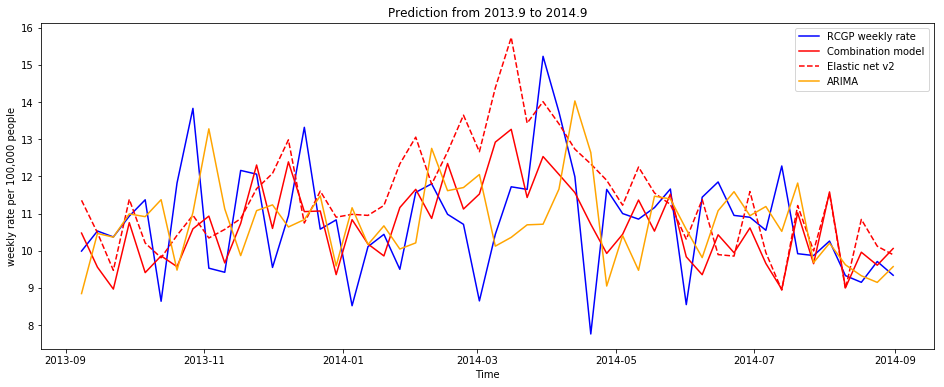

In [263]:
plt.plot(y_test_5[0:], color='blue',label='RCGP weekly rate')
plt.plot(combine_5[0:], color = 'red', label = 'Combination model')
plt.plot(pre5[0:],'r--',label = 'Elastic net v2')
#plt.plot(l5[0:], color = 'green', label = 'Linear regression')
plt.plot(arima_result_5[0:],color='orange',label='ARIMA')

plt.legend()
plt.xlabel('Time')
plt.ylabel('weekly rate per 100,000 people')
plt.title('Prediction from 2013.9 to 2014.9')


In [249]:
M5 = pd.DataFrame(metrics(y_test_5,combine_5).values, index=['Combination model'],columns =['r','MSE','RMSE','MAE','MAPE'])

mm5 = pd.concat([pp5,M5])
mm5.iloc[:,:5]

mmm5 = pd.concat([mm5,arima_M5])
mmm5

r       MSE      RMSE       MAE       MAPE
Linear regression      0.279536  3.773129  1.942454  1.571026  15.374183
Elastic net            0.249859  3.402009  1.844453  1.493755  14.624800
Elastic net version 2  0.275297  3.275138  1.809734  1.399986  13.507822
Combination model      0.309490  2.217875  1.489253  1.201994  11.236742
ARIMA model            0.021389  3.077362  1.754241  1.306440  11.915017

In [250]:
#Combine 5
#2013.9-2014.9 -- 2014.9-2015.9
test_line_5 = pd.date_range(start='2013-09-02',end = '2014-09-01')
y_test_5 = rcgp_data.loc[test_line_5,:].dropna(0)

p = d = q = range(0, 4)
# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))
# Generate all different combinations of seasonal p, q and q triplets
# seasonal_pdq = [(x[0], x[1], x[2], 2) for x in list(itertools.product(p, d, q))]
# seasonal_pdq


In [251]:
# Fit the model
mod = sm.tsa.statespace.SARIMAX(endog = y_test_6,exog = pre6, order=(0,0,4),seasonal_order=(1,0,1,5))
fit_res = mod.fit(disp=0)
print(fit_res.summary())


                                 Statespace Model Results                                
Dep. Variable:                       weekly_rate   No. Observations:                   52
Model:             SARIMAX(0, 0, 4)x(1, 0, 1, 5)   Log Likelihood                 -85.230
Date:                           Thu, 07 Sep 2017   AIC                            186.459
Time:                                   02:23:17   BIC                            202.069
Sample:                               09-07-2014   HQIC                           192.444
                                    - 08-30-2015                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Prediction     1.0025      0.014     74.206      0.000       0.976       1.029
ma.L1          0.4460      0.151      2.948

In [252]:
res = mod.filter(fit_res.params)
c_pre_5 = res.predict()
c_pre_5
#predict_ci = predict.conf_int()
#predict_ci
c_pre_5 = np.asarray(c_pre_5).reshape([52,1])
combine_6 =  pd.DataFrame(c_pre_5, index =y_test_6.index, columns=['combine_result'])


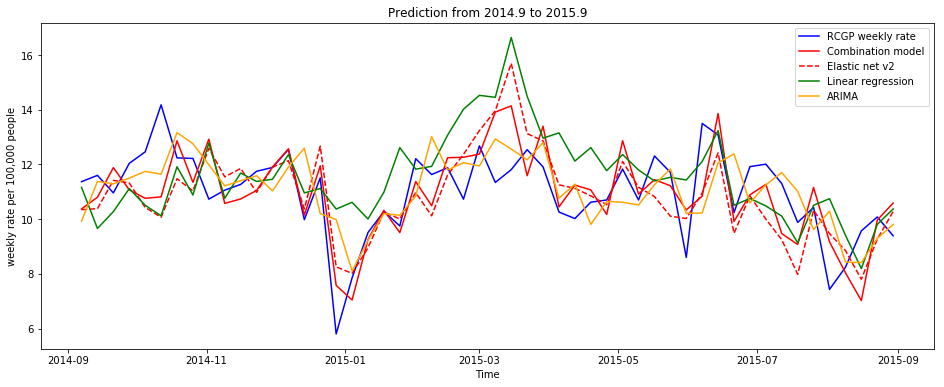

In [253]:
plt.plot(y_test_6[0:], color='blue',label='RCGP weekly rate')
plt.plot(combine_6[0:], color = 'red', label = 'Combination model')
plt.plot(pre6[0:],'r--',label = 'Elastic net v2')
plt.plot(l6[0:], color = 'green', label = 'Linear regression')
plt.plot(arima_result_6[0:],color='orange',label='ARIMA')

plt.legend()
plt.xlabel('Time')
plt.ylabel('weekly rate per 100,000 people')
plt.title('Prediction from 2014.9 to 2015.9')


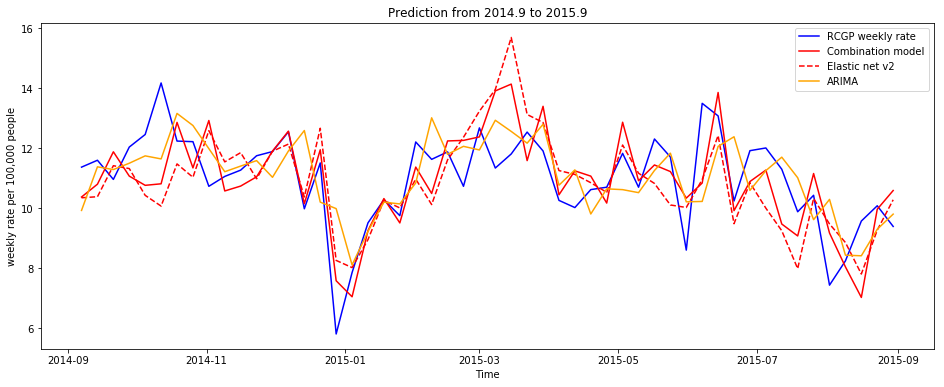

In [264]:
plt.plot(y_test_6[0:], color='blue',label='RCGP weekly rate')
plt.plot(combine_6[0:], color = 'red', label = 'Combination model')
plt.plot(pre6[0:],'r--',label = 'Elastic net v2')
#plt.plot(l6[0:], color = 'green', label = 'Linear regression')
plt.plot(arima_result_6[0:],color='orange',label='ARIMA')

plt.legend()
plt.xlabel('Time')
plt.ylabel('weekly rate per 100,000 people')
plt.title('Prediction from 2014.9 to 2015.9')


In [254]:
M6 = pd.DataFrame(metrics(y_test_6,combine_6).values, index=['Combination model'],columns =['r','MSE','RMSE','MAE','MAPE'])

mm6 = pd.concat([pp6,M6])
mm6.iloc[:,:5]

mmm6 = pd.concat([mm6,arima_M6])
mmm6

r       MSE      RMSE       MAE       MAPE
Linear regression     0.348851  3.383509  1.839432  1.407538  13.907257
Elastic net           0.290187  2.635157  1.623317  1.256142  12.526718
Elastic net version2  0.562680  2.079629  1.442092  1.132423  10.548543
Combination model     0.678782  1.551037  1.245406  0.978898   9.141921
ARIMA model           0.572238  1.708205  1.306983  0.984368   8.970129

In [255]:
# combine 6

In [256]:
mod = sm.tsa.statespace.SARIMAX(endog = y_test_7,exog = pre7, order=(0,0,4),seasonal_order=(1,0,1,6))
fit_res = mod.fit(disp=0)
print(fit_res.summary())


                                 Statespace Model Results                                
Dep. Variable:                       weekly_rate   No. Observations:                   48
Model:             SARIMAX(0, 0, 4)x(1, 0, 1, 6)   Log Likelihood                 -89.027
Date:                           Thu, 07 Sep 2017   AIC                            194.054
Time:                                   02:23:36   BIC                            209.023
Sample:                               09-06-2015   HQIC                           199.711
                                    - 07-31-2016                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Prediction     0.9589      0.054     17.880      0.000       0.854       1.064
ma.L1          0.2171      0.151      1.439

In [257]:
res = mod.filter(fit_res.params)
c_pre_6 = res.predict()
c_pre_6
#predict_ci = predict.conf_int()
#predict_ci
c_pre_6 = np.asarray(c_pre_6).reshape([48,1])
combine_7 =  pd.DataFrame(c_pre_6, index =y_test_7.index, columns=['combine_result'])


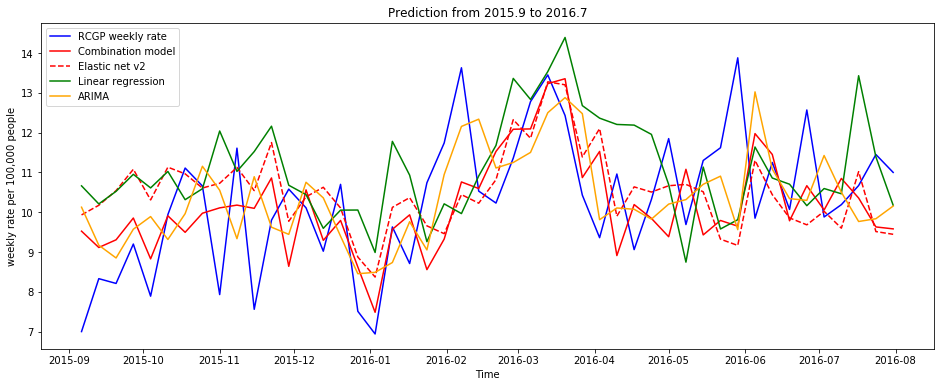

In [266]:
plt.plot(y_test_7[0:], color='blue',label='RCGP weekly rate')
plt.plot(combine_7[0:], color = 'red', label = 'Combination model')
plt.plot(pre7[0:],'r--',label = 'Elastic net v2')
plt.plot(l7[0:], color = 'green', label = 'Linear regression')
plt.plot(arima_result_7[0:],color='orange',label='ARIMA')

plt.legend()
plt.xlabel('Time')
plt.ylabel('weekly rate per 100,000 people')
plt.title('Prediction from 2015.9 to 2016.7')


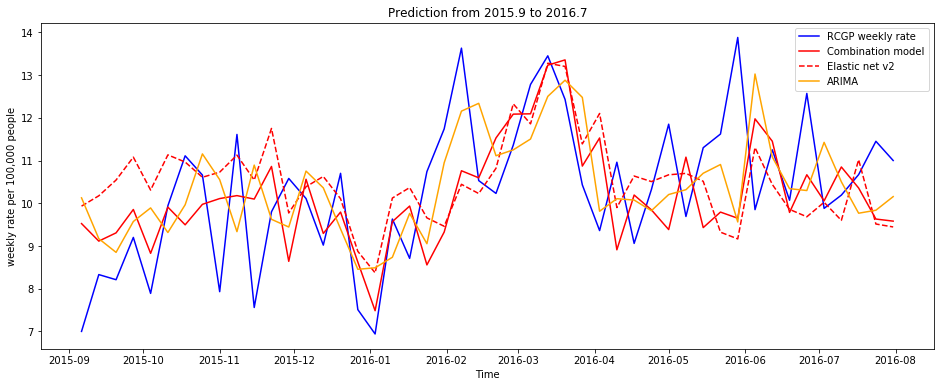

In [267]:
plt.plot(y_test_7[0:], color='blue',label='RCGP weekly rate')
plt.plot(combine_7[0:], color = 'red', label = 'Combination model')
plt.plot(pre7[0:],'r--',label = 'Elastic net v2')
#plt.plot(l7[0:], color = 'green', label = 'Linear regression')
plt.plot(arima_result_7[0:],color='orange',label='ARIMA')

plt.legend()
plt.xlabel('Time')
plt.ylabel('weekly rate per 100,000 people')
plt.title('Prediction from 2015.9 to 2016.7')


In [259]:
M7 = pd.DataFrame(metrics(y_test_7[1:],combine_7[1:]).values, index=['Combination model'],columns =['r','MSE','RMSE','MAE','MAPE'])

mm7 = pd.concat([pp7,M7])
mm7.iloc[:,:5]

mmm7 = pd.concat([mm7,arima_M7])
mmm7

r       MSE      RMSE       MAE       MAPE
Linear regression      0.194119  3.995605  1.998901  1.625250  17.013356
Elastic net            0.196825  3.584703  1.893331  1.503405  16.232602
Elastic net version 2  0.253896  2.903862  1.704072  1.374272  14.052882
Combination model      0.440826  2.306058  1.518571  1.231084  11.858631
ARIMA model            0.433258  2.374463  1.540929  1.246102  12.079123